In [1]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import lmfit as lf

plt.style.use(
    "https://raw.githubusercontent.com/sheamusfitz/mpl-styles/main/smallfigs.mplstyle")

import acorcor
from autocor import *

This little walkthrough is going to have the following stuff:

- I'll generate some random exponentailly correlated data
- get their autocorrelation functions
- fit them to the naive and the bias-corrected autocorrelation forms

# generate data

In [2]:
ntries = 1000
sample_len = 256
noise = np.random.normal(0, 1, size=(ntries, sample_len))
tau = 256/5

`the_sig` is the generated data series with the mean subtracted off. 

`with_mean` does **not** have the mean subtracted.

In [3]:
the_sig = np.zeros_like(noise)
with_mean = np.zeros_like(noise)
f = np.exp(-1/tau)
the_sig[:, 0] = noise[:, 0]
with_mean[:, 0] = noise[:, 0]
for i in range(ntries):
    print(i, end='\t')
    for j in range(1, sample_len):
        the_sig[i, j] = f * the_sig[i, j-1] + (1-f**2)**(1/2)*noise[i, j]
    with_mean[i, :] = np.copy(the_sig[i, :])
    the_sig[i, :] -= np.mean(the_sig[i, :])

0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	100	101	102	103	104	105	106	107	108	109	110	111	112	113	114	115	116	117	118	119	120	121	122	123	124	125	126	127	128	129	130	131	132	133	134	135	136	137	138	139	140	141	142	143	144	145	146	147	148	149	150	151	152	153	154	155	156	157	158	159	160	161	162	163	164	165	166	167	168	169	170	171	172	173	174	175	176	177	178	179	180	181	182	183	184	185	186	187	188	189	190	191	192	193	194	195	196	197	198	199	200	201	202	203	204	205	206	207	208	209	210	211	212	213	214	215	216	217	218	219	220	221	222	223	224	225	226	227	228	229	230	231	232	233	234	235	236	237	238	239	240	241	242	243	244	245	246	247	248	249	250	251	252	253	254	255	256	257	258	259	260	261	262	263	264	265	266	267	268	269	270	271	272	273	274	275	276	27

In [4]:
# plt.figure(figsize=(4,3))
# plt.plot(np.arange(0, sample_len, 20), the_sig[0, ::20])
# plt.plot(np.arange(0, sample_len, 20), with_mean[0, ::20])
# plt.ylim(-3,3)
# plt.title(f'$\\tau = ${tau}')
# plt.ylabel('$r_n$')
# plt.xlabel('$n$')
# plt.show()


# plt.plot(the_sig[0, :sample_len//20])
# plt.plot(with_mean[0, :sample_len//20])
# plt.ylim(-3,3)
# plt.show()

In [5]:
acor = np.zeros_like(the_sig)
for i in range(ntries):
    acor[i] = autocor(the_sig[i])
lags = np.arange(sample_len)
theoretical = np.exp(-np.abs(lags)/tau)

meanacor = np.zeros_like(the_sig)
lr_a1 = np.zeros((ntries,len(the_sig[0])-1))
lr_a2 = np.zeros((ntries,len(the_sig[0])-1))
lr_a3 = np.zeros((ntries,len(the_sig[0])-1))
lr_a4 = np.zeros((ntries,len(the_sig[0])-1))
lr_a5 = np.zeros((ntries,len(the_sig[0])-1))
for i in range(ntries):
    meanacor[i] = autocor(with_mean[i], demean=False)
    lr_a1[i] = lr1(with_mean[i])
    lr_a2[i] = lr2(with_mean[i])
    lr_a3[i] = lr3(with_mean[i])
    lr_a4[i] = lr4(with_mean[i])
    lr_a5[i] = lr5(with_mean[i])
    print(f"{i}/{ntries}", end=' ')

0/1000 1/1000 2/1000 3/1000 4/1000 5/1000 6/1000 7/1000 8/1000 9/1000 10/1000 11/1000 12/1000 13/1000 14/1000 15/1000 16/1000 17/1000 18/1000 19/1000 20/1000 21/1000 22/1000 23/1000 24/1000 25/1000 26/1000 27/1000 28/1000 29/1000 30/1000 31/1000 32/1000 33/1000 34/1000 35/1000 36/1000 37/1000 38/1000 39/1000 40/1000 41/1000 42/1000 43/1000 44/1000 45/1000 46/1000 47/1000 48/1000 49/1000 50/1000 51/1000 52/1000 53/1000 54/1000 55/1000 56/1000 57/1000 58/1000 59/1000 60/1000 61/1000 62/1000 63/1000 64/1000 65/1000 66/1000 67/1000 68/1000 69/1000 70/1000 71/1000 72/1000 73/1000 74/1000 75/1000 76/1000 77/1000 78/1000 79/1000 80/1000 81/1000 82/1000 83/1000 84/1000 85/1000 86/1000 87/1000 88/1000 89/1000 90/1000 91/1000 92/1000 93/1000 94/1000 95/1000 96/1000 97/1000 98/1000 99/1000 100/1000 101/1000 102/1000 103/1000 104/1000 105/1000 106/1000 107/1000 108/1000 109/1000 110/1000 111/1000 112/1000 113/1000 114/1000 115/1000 116/1000 117/1000 118/1000 119/1000 120/1000 121/1000 122/1000 123

936/1000 937/1000 938/1000 939/1000 940/1000 941/1000 942/1000 943/1000 944/1000 945/1000 946/1000 947/1000 948/1000 949/1000 950/1000 951/1000 952/1000 953/1000 954/1000 955/1000 956/1000 957/1000 958/1000 959/1000 960/1000 961/1000 962/1000 963/1000 964/1000 965/1000 966/1000 967/1000 968/1000 969/1000 970/1000 971/1000 972/1000 973/1000 974/1000 975/1000 976/1000 977/1000 978/1000 979/1000 980/1000 981/1000 982/1000 983/1000 984/1000 985/1000 986/1000 987/1000 988/1000 989/1000 990/1000 991/1000 992/1000 993/1000 994/1000 995/1000 996/1000 997/1000 998/1000 999/1000 

In [6]:
msds = np.zeros_like(the_sig)
for i in range(ntries):
    msds[i] = msd(with_mean[i])

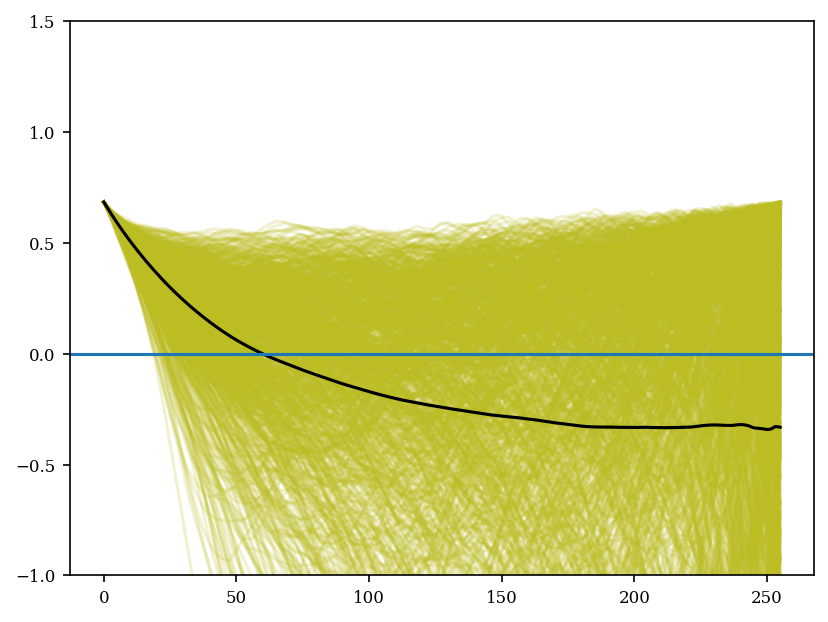

In [ ]:
plt.plot(np.var(the_sig)-msds.T/2, c='C8', alpha = 0.2)
plt.plot(np.mean(np.var(the_sig)-msds.T/2, axis=1), c='k')
plt.axhline(0)
plt.ylim(-1,1.5)
plt.show()

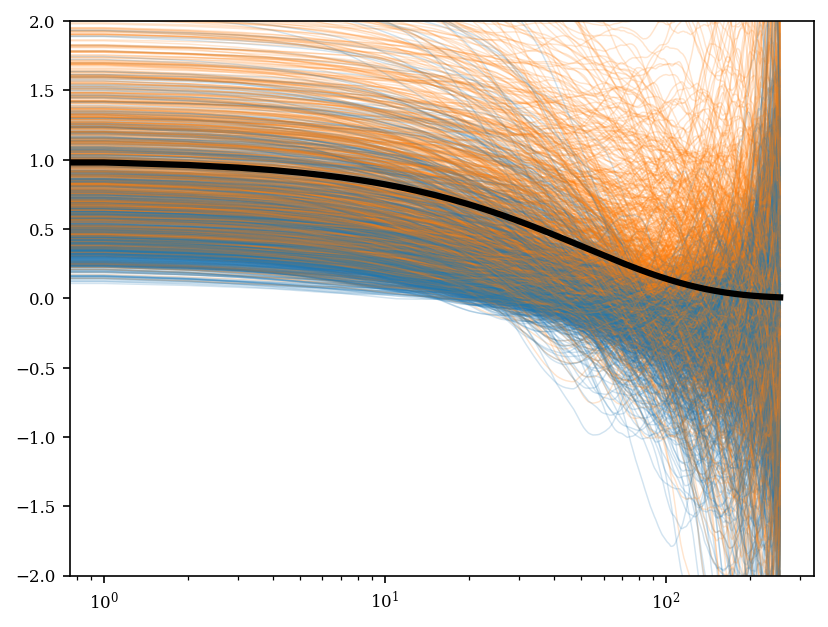

In [9]:
for i in range(1,ntries):
    plt.plot(lags, acor[i], 'C0', alpha = 0.2, lw=0.7)
    plt.plot(lags, meanacor[i], 'C1', alpha = 0.2, lw=0.7)
plt.plot(lags, theoretical, 'k', lw=3, label = '$e^{-t/τ}$')
# plt.yscale('symlog', linthresh=0.8)
plt.ylim(-2,2)
plt.xscale('log')

In [10]:
titles = ["$\mu\\approx \widebar{x}$", "$\mu=0$", "wrong LR, in", "right LR, in", 
          "wrong LR, out", "right LR, out", "$-\mu^2$", "$ACOR=\sigma^2-MSD/2$"]
titles

['$\\mu\\approx \\widebar{x}$',
 '$\\mu=0$',
 'wrong LR, in',
 'right LR, in',
 'wrong LR, out',
 'right LR, out',
 '$-\\mu^2$',
 '$ACOR=\\sigma^2-MSD/2$']

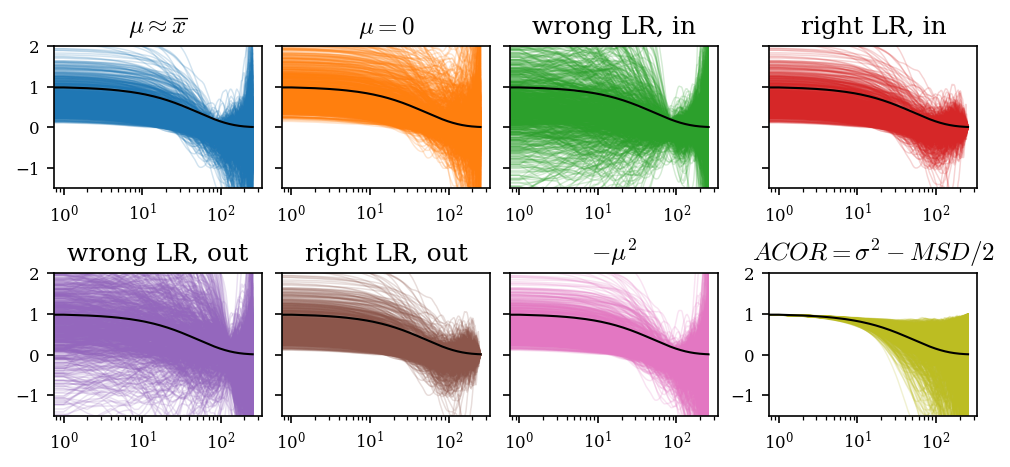

In [11]:
na, nb = 2, 4
plt.subplots(na, nb, figsize=(6.5, 3), constrained_layout=True)

for ser in range(2):
    plt.subplot(na, nb, ser+1)
    thisser = [acor, meanacor][ser]
    for i in range(ntries):
        plt.plot(lags, thisser[i], f'C{ser}', alpha = 0.2, lw=0.7)
    plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
    plt.ylim(-1.5,2)
    if ser != 0:
        plt.gca().set_yticks(ticks=np.arange(-1, 3), labels=[])
    plt.xscale('log')

for ser in range(5):
    plt.subplot(na, nb, ser+3)
    thisser = [lr_a1, lr_a2, lr_a3, lr_a4, lr_a5][ser]
    for i in range(1,ntries):
        plt.plot(lags[:-1], thisser[i], f'C{ser+2}', alpha = 0.2, lw=0.7)
    plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
    plt.ylim(-1.5,2)
    if ser != 2:
        plt.gca().set_yticks(ticks=np.arange(-1, 3), labels=[])
    plt.xscale('log')
# plt.subplot(na, nb, na*nb)
# plt.gca().axis('off')

plt.subplot(na, nb, 8)

acor_from_msds = np.var(with_mean)-msds.T/2
plt.plot(acor_from_msds, c='C8', alpha = 0.2, lw=0.7)
# plt.plot(np.mean(acor_from_msds, axis=1), c='k', lw=1)
plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
plt.xscale('log')
plt.ylim(-1.5,2)

for sub in range(8):
    plt.subplot(na, nb, sub+1)
    plt.title(titles[sub])

In [12]:
lags

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [36]:
with open('/Users/shea/dcuments/research/multistrex/256-51.npy', 'rb') as f:
    exactvar = np.load(f)
with open('/Users/shea/dcuments/research/multistrex/256-51-zerovar.npy', 'rb') as f:
    zerovar = np.load(f)
with open('/Users/shea/dcuments/research/multistrex/256-51-varlr.npy', 'rb') as f:
    varlr = np.load(f)

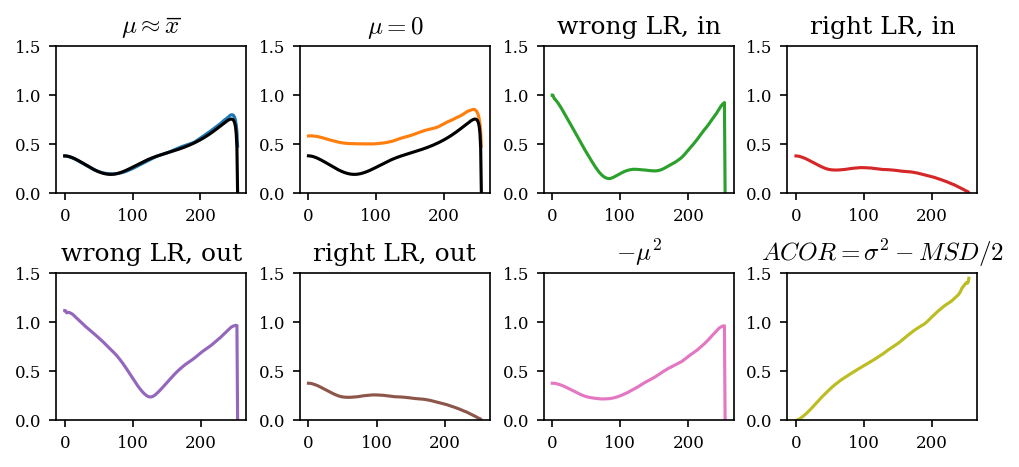

In [17]:
na, nb = 2, 4
ylims=(0,1.5)
plt.subplots(na, nb, figsize=(6.5, 3), constrained_layout=True)

for ser in range(2):
    plt.subplot(na, nb, ser+1)
    thisser = [acor, meanacor][ser]
    plt.plot(np.std(thisser, axis=0), c=f'C{ser}')
#     plt.plot(exactvar**0.5, 'k')
#     for i in range(ntries):
#         plt.plot(lags, thisser[i], f'C{ser}', alpha = 0.2, lw=0.7)
#     plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
    plt.ylim(ylims)
#     if ser != 0:
#         plt.gca().set_yticks(ticks=np.arange(0,1.001,0.25), labels=[])
#     plt.xscale('log')

for ser in range(5):
    plt.subplot(na, nb, ser+3)
    thisser = [lr_a1, lr_a2, lr_a3, lr_a4, lr_a5][ser]
    plt.plot(np.std(thisser, axis=0), f'C{ser+2}')
#     plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
    plt.ylim(ylims)
#     if ser != 2:
#         plt.gca().set_yticks(ticks=np.arange(-1, 3), labels=[])
#     plt.xscale('log')
# plt.subplot(na, nb, na*nb)
# plt.gca().axis('off')

plt.subplot(na, nb, 8)

acor_from_msds = np.var(with_mean)-msds.T/2
plt.plot(np.std(acor_from_msds, axis=1), c='C8')
# plt.plot(np.mean(acor_from_msds, axis=1), c='k', lw=1)
# plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
# plt.xscale('log')
plt.ylim(ylims)

for sub in range(8):
    plt.subplot(na, nb, sub+1)
    plt.title(titles[sub])

(0.0, 1.5)

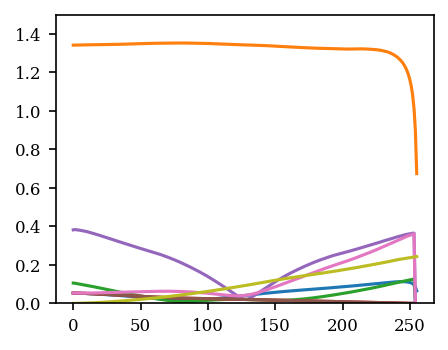

In [32]:
na, nb = 2, 4
ylims=(0,1.5)
plt.figure(figsize=(3.25, 2.5))

for ser in range(2):
    thisser = [acor, meanacor][ser]
    plt.plot(np.std(thisser, axis=0), c=f'C{ser}')


for ser in range(5):
    thisser = [lr_a1, lr_a2, lr_a3, lr_a4, lr_a5][ser]
    plt.plot(np.std(thisser, axis=0), f'C{ser+2}')

acor_from_msds = np.var(with_mean)-msds.T/2
plt.plot(np.std(acor_from_msds, axis=1), c='C8')
plt.ylim(ylims)

# for sub in range(8):
#     plt.subplot(na, nb, sub+1)
#     plt.title(titles[sub])

Text(0.5, -0.1, 'lagtime')

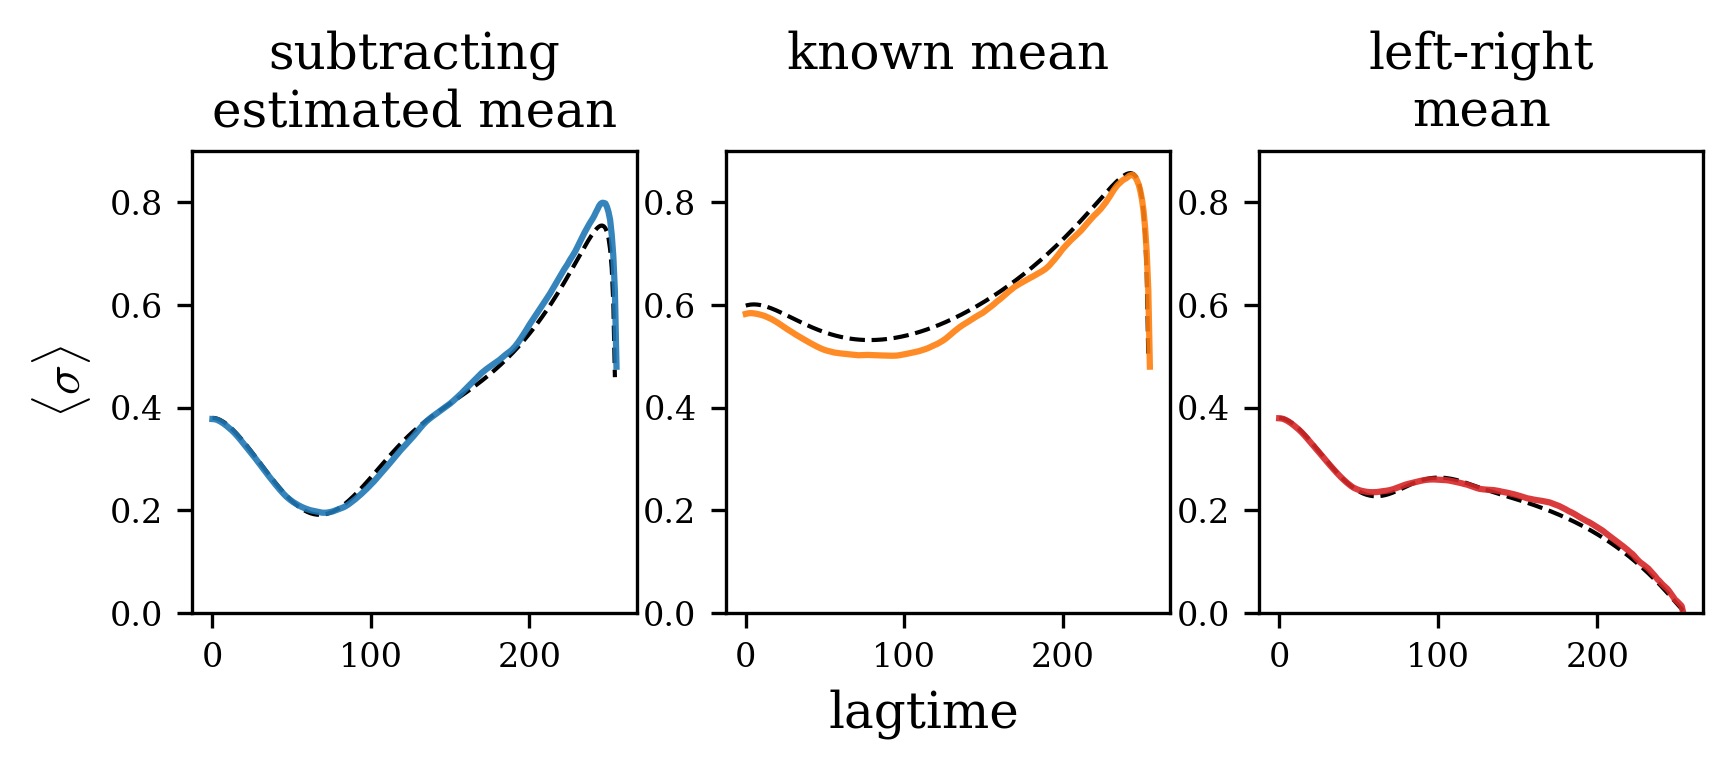

In [67]:
na, nb = 2, 4
ylims=(0,0.9)
plt.subplots(1, 3, figsize=(6.5, 2), dpi=300)

plt.subplot(131)
thisser = acor
plt.plot(exactvar[:-1]**0.5, 'k--', lw=1)
plt.plot(np.std(thisser, axis=0), c=f'C0', alpha=0.9)

plt.subplot(132)
thisser = meanacor
plt.plot(zerovar[:-1]**0.5, 'k--', lw=1)
plt.plot(np.std(thisser, axis=0), c=f'C1', alpha=0.9)

plt.subplot(133)
thisser = lr_a2
plt.plot(varlr[:-1]**0.5, 'k--', lw=1)
plt.plot(np.std(thisser, axis=0), c=f'C3', alpha=0.9)

for sub in range(3):
    plt.subplot(1, 3, sub+1)
    plt.ylim(ylims)

plt.subplot(131)
plt.title("subtracting\nestimated mean")
plt.ylabel("$\langle \sigma \\rangle$", size=12)

plt.subplot(132)
plt.title("known mean\n")

plt.subplot(133)
plt.title("left-right\nmean")

plt.gcf().supxlabel("lagtime", size=12, y=-0.1)

(0.0, 0.9)

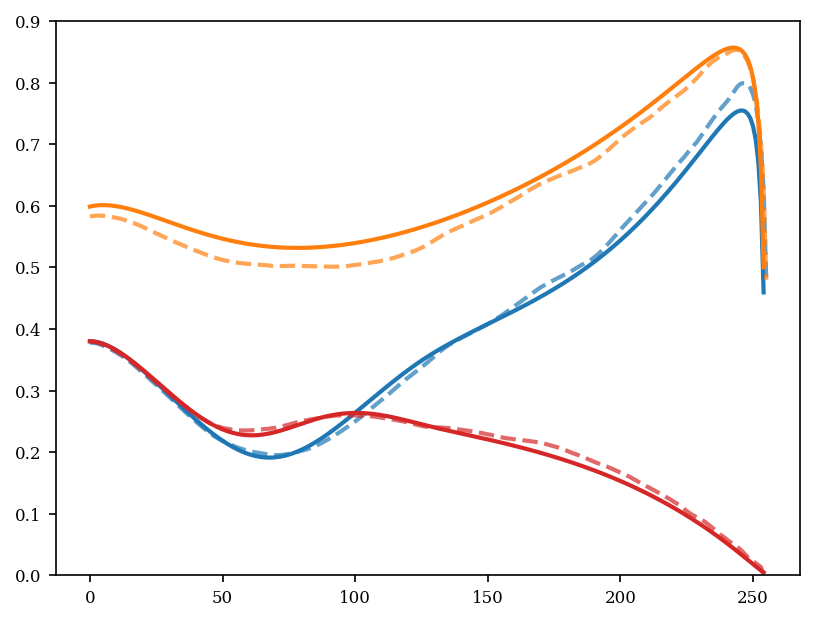

In [80]:
na, nb = 2, 4
ylims=(0,0.9)
plt.plot(figsize=(3.25, 2), dpi=300)

alpha = 0.7
lw=2

thisser = acor
plt.plot(exactvar[:-1]**0.5, 'C0-', lw=lw)
plt.plot(np.std(thisser, axis=0), f'C0--', alpha=alpha, lw=lw, label=)

thisser = meanacor
plt.plot(zerovar[:-1]**0.5, 'C1-', lw=lw)
plt.plot(np.std(thisser, axis=0), f'C1--', alpha=alpha, lw=lw)

# plt.subplot(133)
thisser = lr_a2
plt.plot(varlr[:-1]**0.5, 'C3-', lw=lw)
plt.plot(np.std(thisser, axis=0), f'C3--', alpha=alpha, lw=lw)


plt.ylim(ylims)

# plt.gcf().supxlabel("lagtime", size=12, y=-0.1)

In [51]:
print(len(lr_a2[0]), len(acor[0]), len(varlr))

255 256 256


(0.0, 0.8756278461236345)

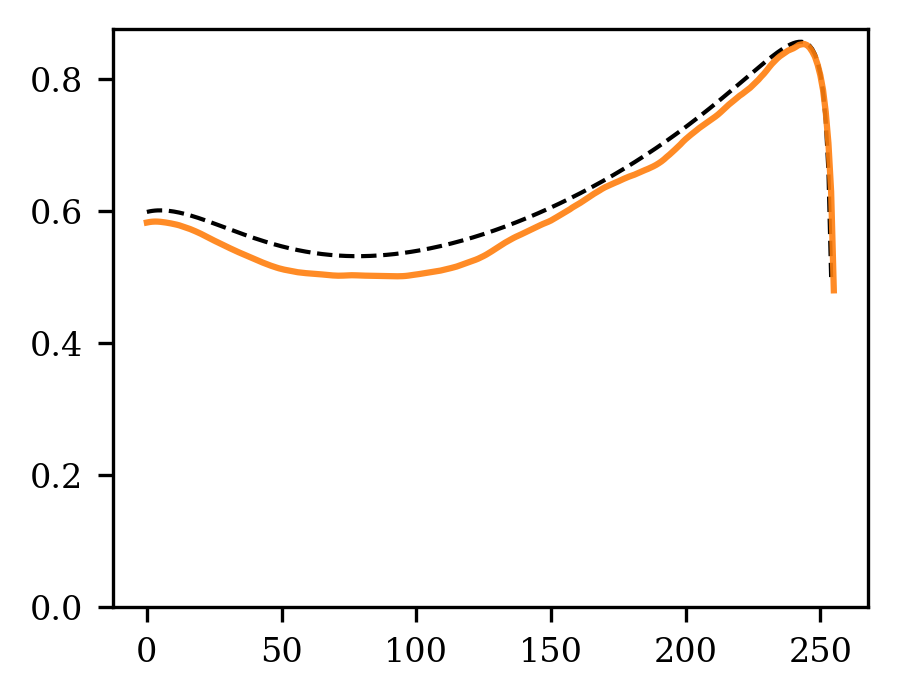

In [34]:
na, nb = 2, 4
ylims=(0,1.5)
plt.figure(figsize=(3.25, 2.5), dpi=300)

thisser = meanacor
plt.plot(zerovar[:-1]**0.5, 'k--', lw=1)
plt.plot(np.std(thisser, axis=0), c=f'C1', alpha=0.9)



plt.ylim(bottom=0)


(0.0, 1.0)

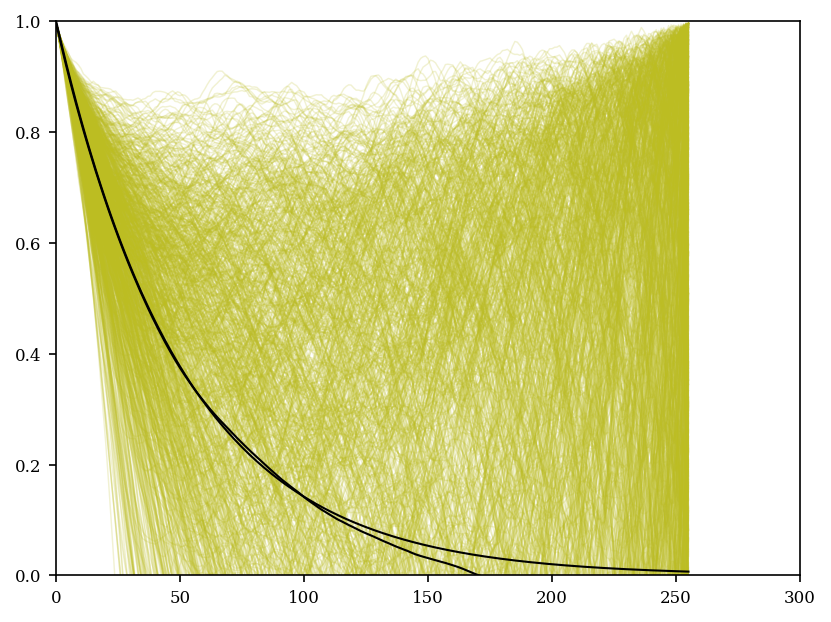

In [35]:

acor_from_msds = np.var(with_mean)-msds.T/2
plt.plot(acor_from_msds, c='C8', alpha = 0.2, lw=0.7)
plt.plot(np.mean(acor_from_msds, axis=1), c='k', lw=1)
plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
# plt.xscale('log')
plt.xlim(0,300)
plt.ylim(0,1)


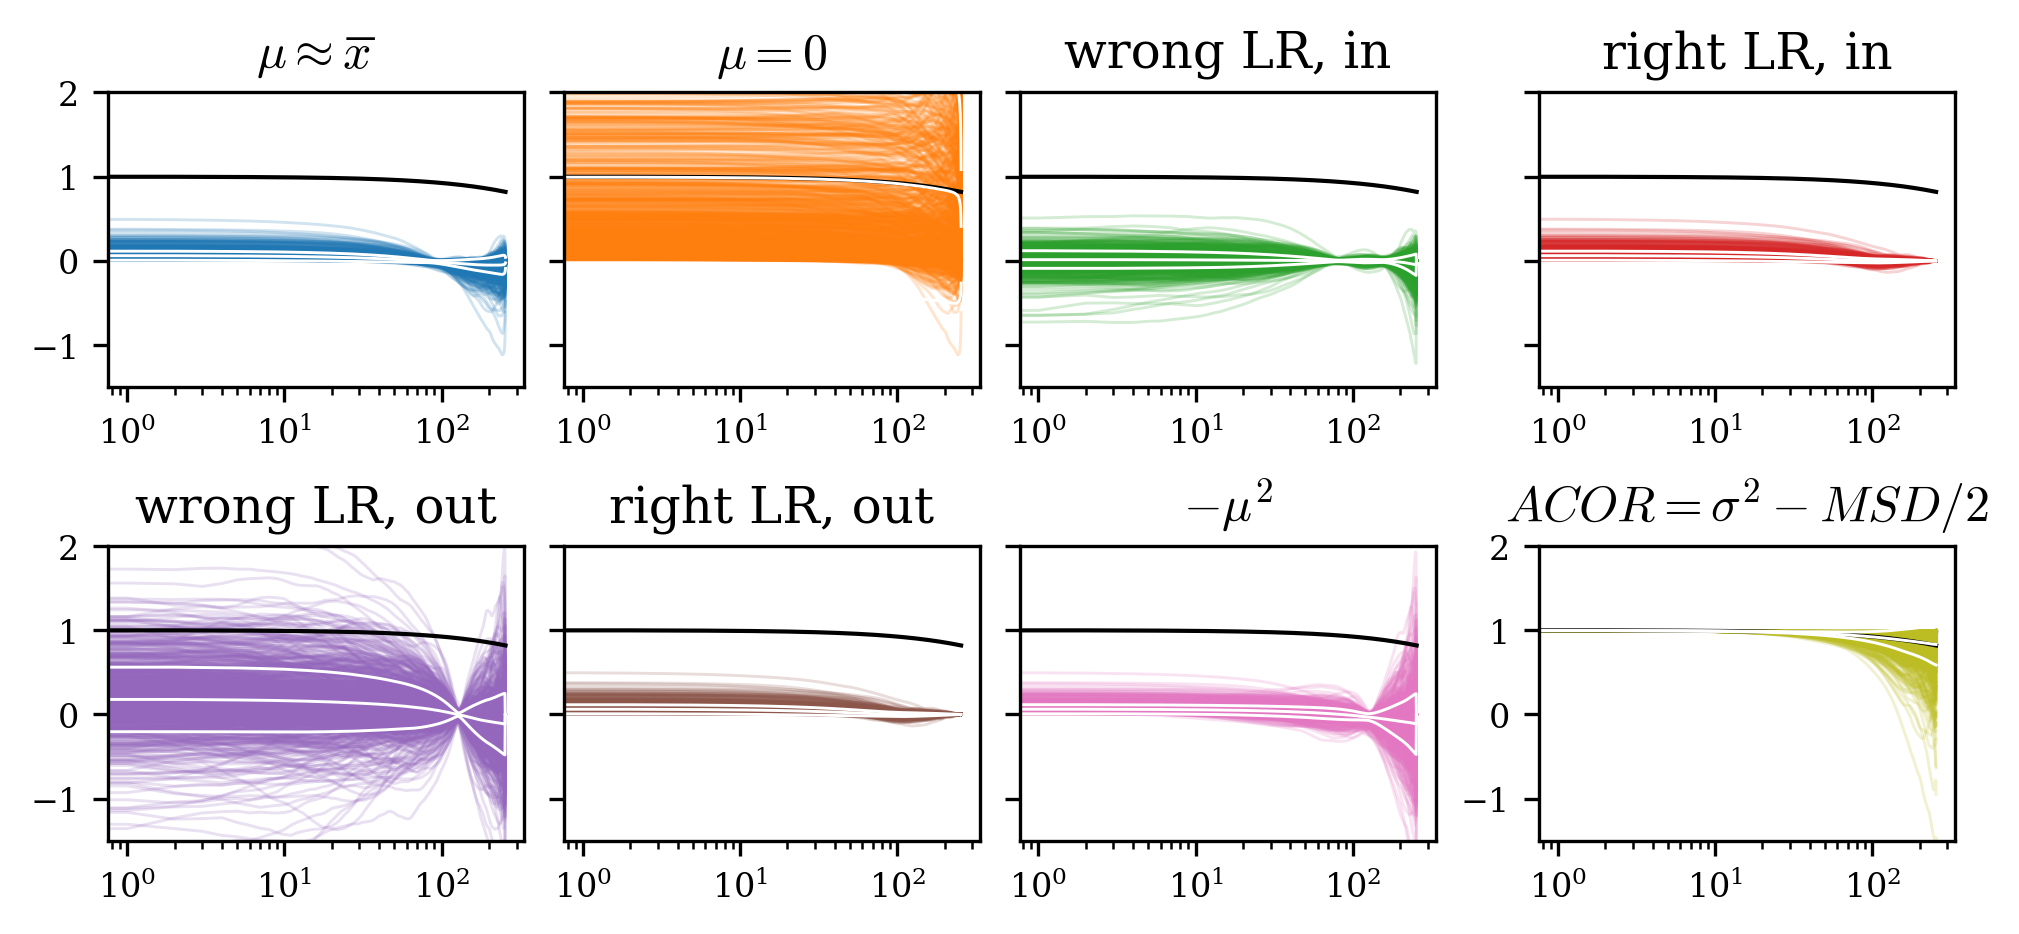

In [34]:
na, nb = 2, 4
plt.subplots(na, nb, figsize=(6.5, 3), constrained_layout=True, dpi=300)

for ser in range(2):
    plt.subplot(na, nb, ser+1)
    thisser = [acor, meanacor][ser]
    for i in range(ntries):
        plt.plot(lags, thisser[i], f'C{ser}', alpha = 0.2, lw=0.7)
    plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
    m_ = np.mean(thisser, axis=0)
    s_ = np.std(thisser, axis=0)
    plt.plot(lags, m_, 'w', alpha = 1, lw=0.7)
    plt.plot(lags, m_+s_, 'w', alpha = 1, lw=0.7)
    plt.plot(lags, m_-s_, 'w', alpha = 1, lw=0.7)
    plt.ylim(-1.5,2)
    if ser != 0:
        plt.gca().set_yticks(ticks=np.arange(-1, 3), labels=[])
    plt.xscale('log')

for ser in range(5):
    plt.subplot(na, nb, ser+3)
    thisser = [lr_a1, lr_a2, lr_a3, lr_a4, lr_a5][ser]
    for i in range(1,ntries):
        plt.plot(lags[:-1], thisser[i], f'C{ser+2}', alpha = 0.2, lw=0.7)
    plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
    m_ = np.mean(thisser, axis=0)
    s_ = np.std(thisser, axis=0)
    plt.plot(lags[:-1], m_, 'w', alpha = 1, lw=0.7)
    plt.plot(lags[:-1], m_+s_, 'w', alpha = 1, lw=0.7)
    plt.plot(lags[:-1], m_-s_, 'w', alpha = 1, lw=0.7)
    
    plt.ylim(-1.5,2)
    if ser != 2:
        plt.gca().set_yticks(ticks=np.arange(-1, 3), labels=[])
    plt.xscale('log')



plt.subplot(na, nb, 8)

acor_from_msds = np.var(with_mean)-msds.T/2
m_ = np.mean(acor_from_msds, axis=1)
s_ = np.std(acor_from_msds, axis=1)
plt.plot(acor_from_msds, c='C8', alpha = 0.2, lw=0.7)
plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
plt.plot(m_, c='w', lw=0.7)
plt.plot(lags, m_+s_, 'w', alpha = 1, lw=0.7)
plt.plot(lags, m_-s_, 'w', alpha = 1, lw=0.7)
plt.xscale('log')
plt.ylim(-1.5,2)

for sub in range(8):
    plt.subplot(na, nb, sub+1)
    plt.title(titles[sub])

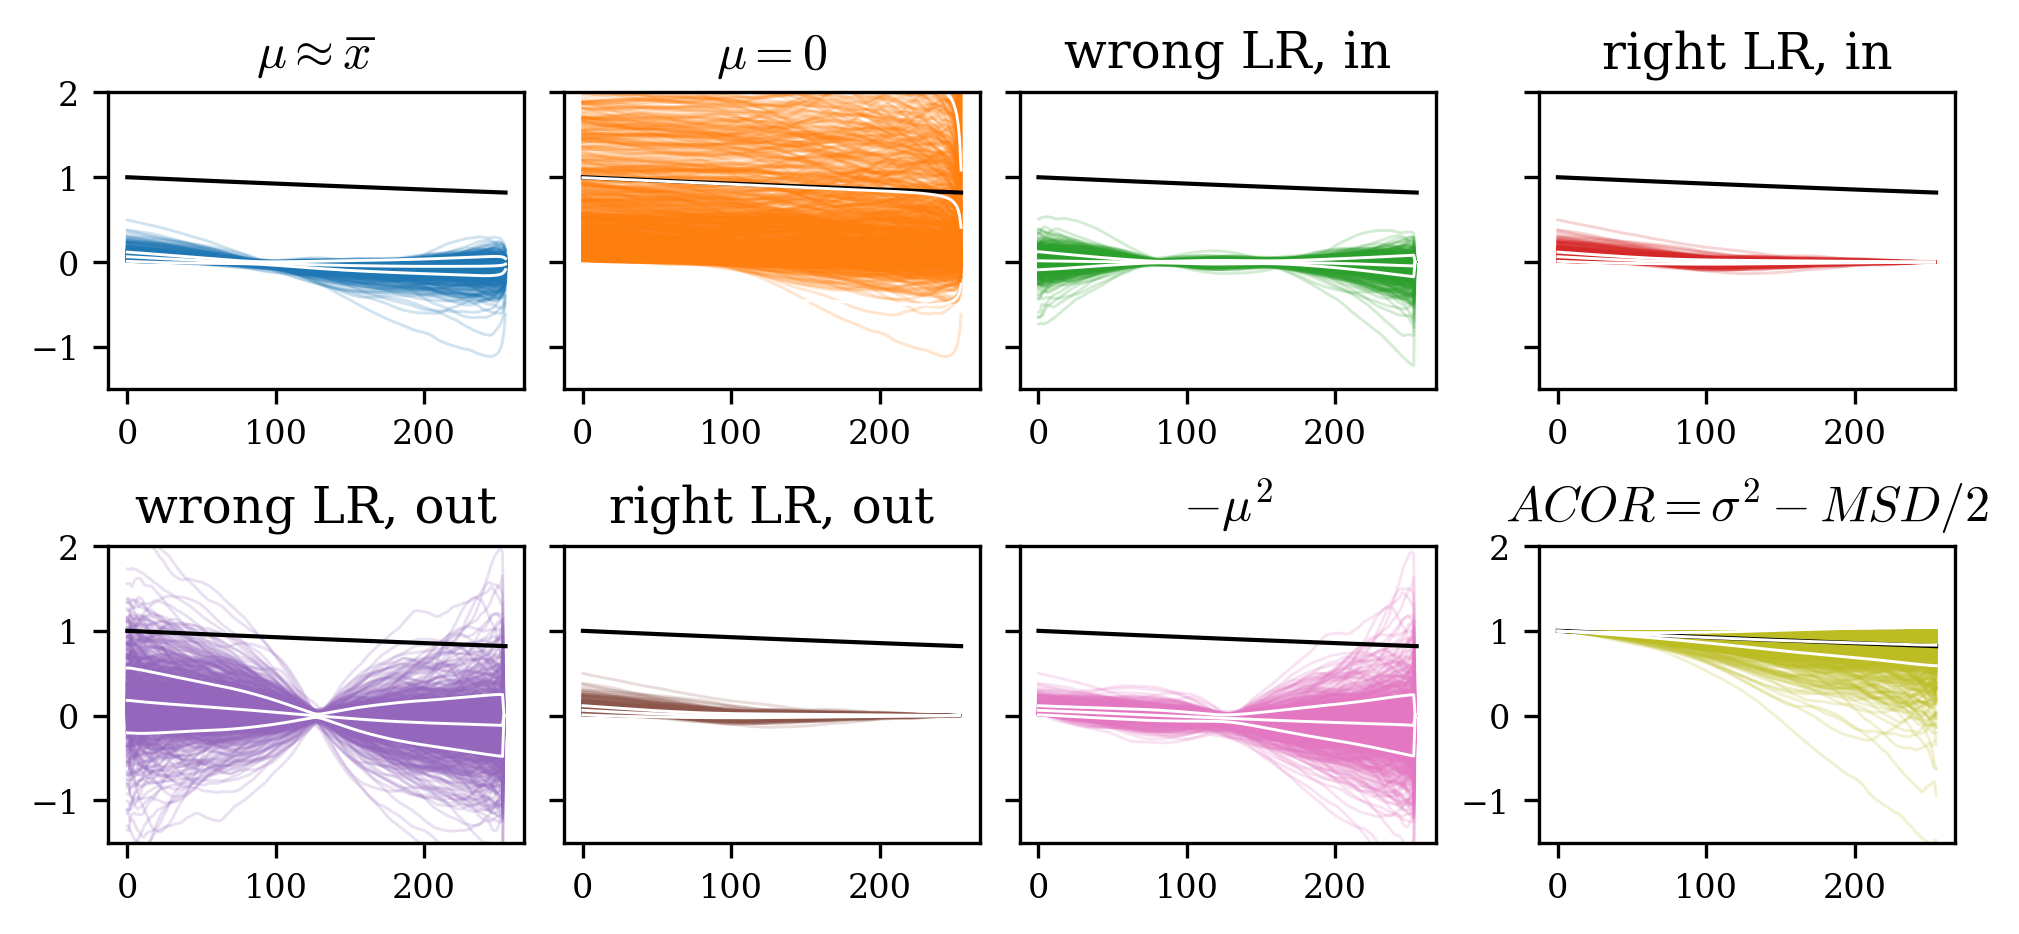

In [35]:
na, nb = 2, 4
plt.subplots(na, nb, figsize=(6.5, 3), constrained_layout=True, dpi=300)

for ser in range(2):
    plt.subplot(na, nb, ser+1)
    thisser = [acor, meanacor][ser]
    for i in range(ntries):
        plt.plot(lags, thisser[i], f'C{ser}', alpha = 0.2, lw=0.7)
    plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
    m_ = np.mean(thisser, axis=0)
    s_ = np.std(thisser, axis=0)
    plt.plot(lags, m_, 'w', alpha = 1, lw=0.7)
    plt.plot(lags, m_+s_, 'w', alpha = 1, lw=0.7)
    plt.plot(lags, m_-s_, 'w', alpha = 1, lw=0.7)
    plt.ylim(-1.5,2)
    if ser != 0:
        plt.gca().set_yticks(ticks=np.arange(-1, 3), labels=[])
#     plt.xscale('log')

for ser in range(5):
    plt.subplot(na, nb, ser+3)
    thisser = [lr_a1, lr_a2, lr_a3, lr_a4, lr_a5][ser]
    for i in range(1,ntries):
        plt.plot(lags[:-1], thisser[i], f'C{ser+2}', alpha = 0.2, lw=0.7)
    plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
    m_ = np.mean(thisser, axis=0)
    s_ = np.std(thisser, axis=0)
    plt.plot(lags[:-1], m_, 'w', alpha = 1, lw=0.7)
    plt.plot(lags[:-1], m_+s_, 'w', alpha = 1, lw=0.7)
    plt.plot(lags[:-1], m_-s_, 'w', alpha = 1, lw=0.7)
    
    plt.ylim(-1.5,2)
    if ser != 2:
        plt.gca().set_yticks(ticks=np.arange(-1, 3), labels=[])
#     plt.xscale('log')



plt.subplot(na, nb, 8)

acor_from_msds = np.var(with_mean)-msds.T/2
m_ = np.mean(acor_from_msds, axis=1)
s_ = np.std(acor_from_msds, axis=1)
plt.plot(acor_from_msds, c='C8', alpha = 0.2, lw=0.7)
plt.plot(lags, theoretical, 'k', lw=1, label = '$e^{-t/τ}$')
plt.plot(m_, c='w', lw=0.7)
plt.plot(lags, m_+s_, 'w', alpha = 1, lw=0.7)
plt.plot(lags, m_-s_, 'w', alpha = 1, lw=0.7)
# plt.xscale('log')
plt.ylim(-1.5,2)

for sub in range(8):
    plt.subplot(na, nb, sub+1)
    plt.title(titles[sub])

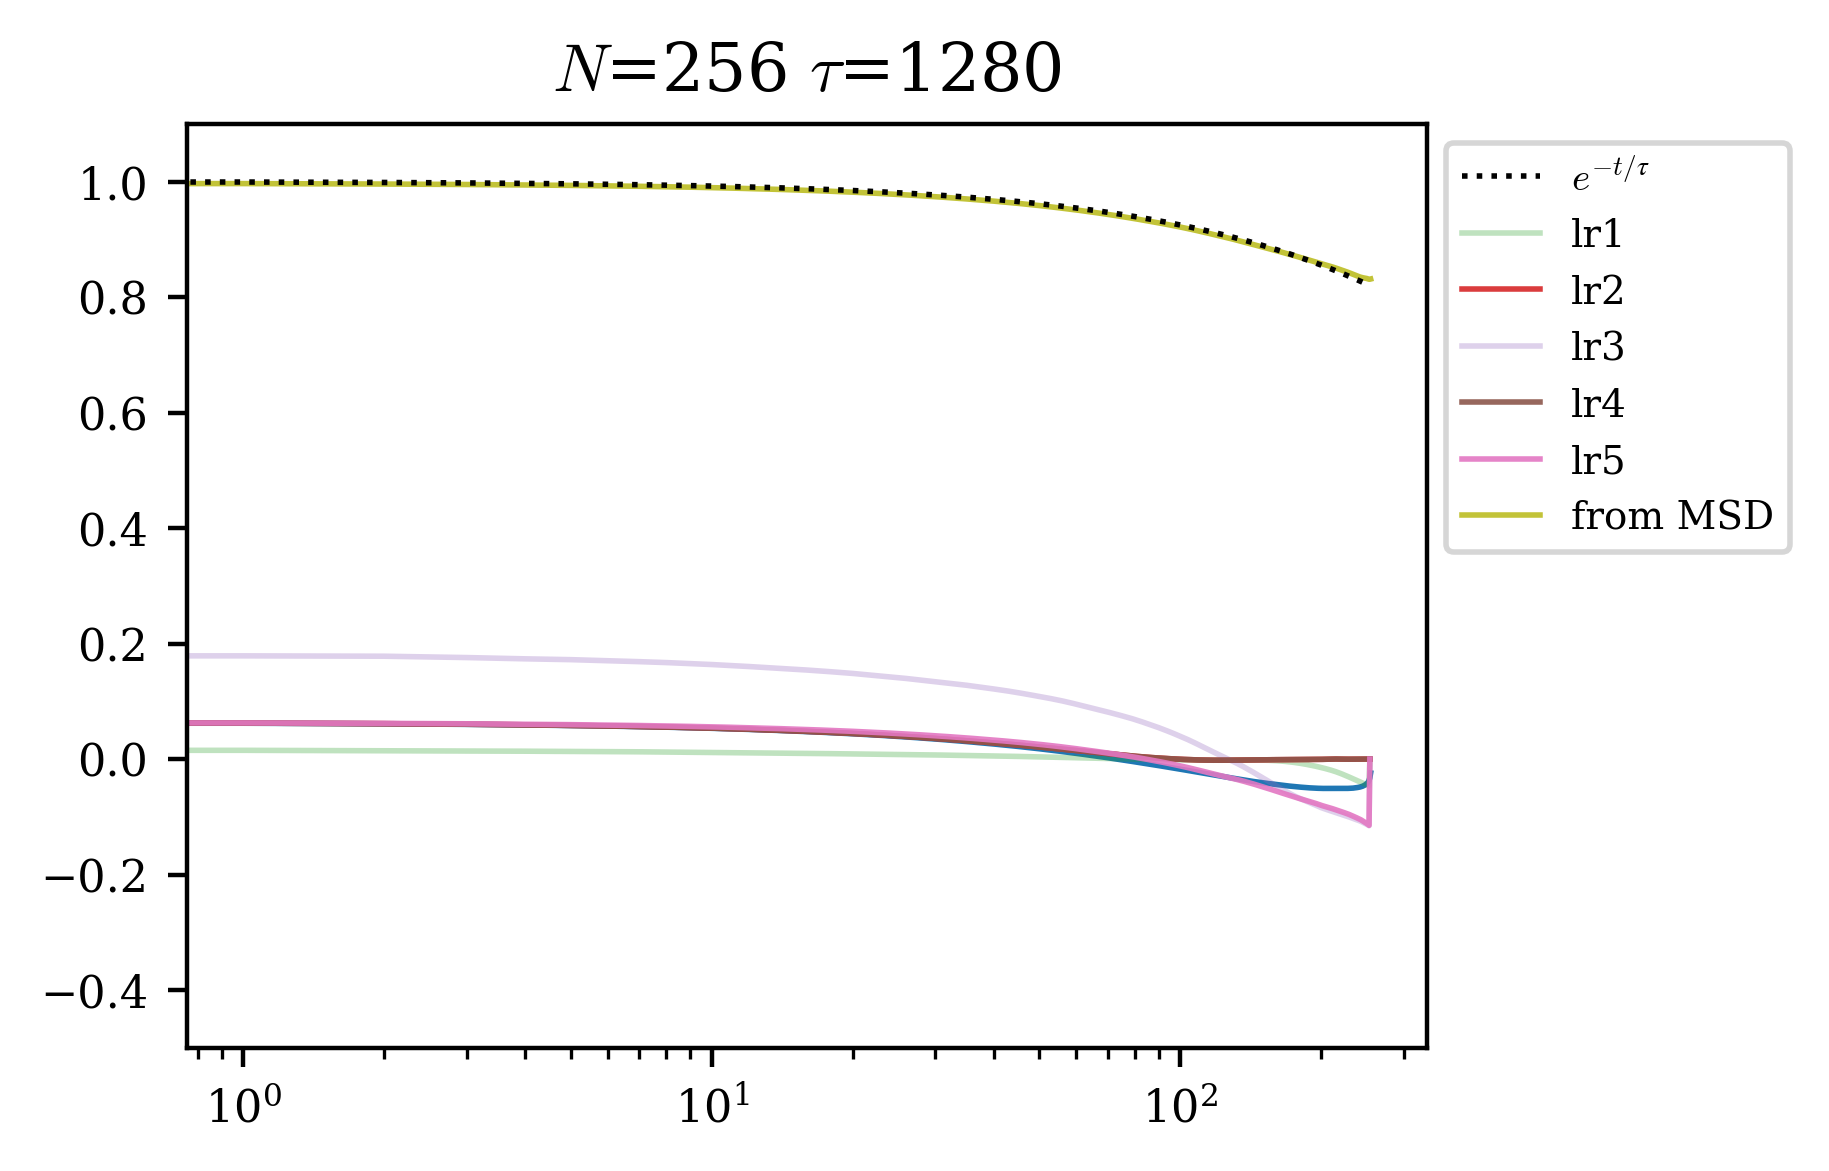

In [38]:
lw = 1
alpha1 = 0.9
alpha2 = 0.3
# for i in range(1,ntries):
#     plt.plot(lags, acor[i], 'C0', alpha = 0.2, lw=0.7)
#     plt.plot(lags, meanacor[i], 'C1', alpha = 0.2, lw=0.7)
#     plt.plot(lags[:-1], lr_a1[i], 'C2', alpha = 0.2, lw=0.7)
#     plt.plot(lags[:-1], lr_a2[i], 'C3', alpha = 0.2, lw=0.7)
#     plt.plot(lags[:-1], lr_a3[i], 'C4', alpha = 0.2, lw=0.7)
plt.figure(figsize=(4,3), dpi=400)
plt.plot(lags, theoretical, 'k:', lw=lw, label = '$e^{-t/τ}$')

plt.plot(lags, np.mean(acor, axis=0), 'C0', lw=lw)


# plt.plot(lags, np.mean(meanacor, axis=0), 'C1', lw=3)
plt.plot(lags[:-1], np.mean(lr_a1, axis=0), 'C2', lw=lw, label='lr1', alpha=alpha2)
plt.plot(lags[:-1], np.mean(lr_a2, axis=0), 'C3', lw=lw, label='lr2', alpha=alpha1)
plt.plot(lags[:-1], np.mean(lr_a3, axis=0), 'C4', lw=lw, label='lr3', alpha=alpha2)
plt.plot(lags[:-1], np.mean(lr_a4, axis=0), 'C5', lw=lw, label='lr4', alpha=alpha1)
plt.plot(lags[:-1], np.mean(lr_a5, axis=0), 'C6', lw=lw, label='lr5', alpha=alpha1)
plt.plot(lags, np.mean(acor_from_msds, axis=1), 'C8', lw=lw, label='from MSD', alpha=alpha1, zorder=-1000)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
# plt.yscale('symlog', linthresh=0.8)
plt.ylim(-0.5, 1.1)
plt.xscale('log')
plt.title(f"$N$={sample_len}\t$\\tau$={tau}")
plt.show()

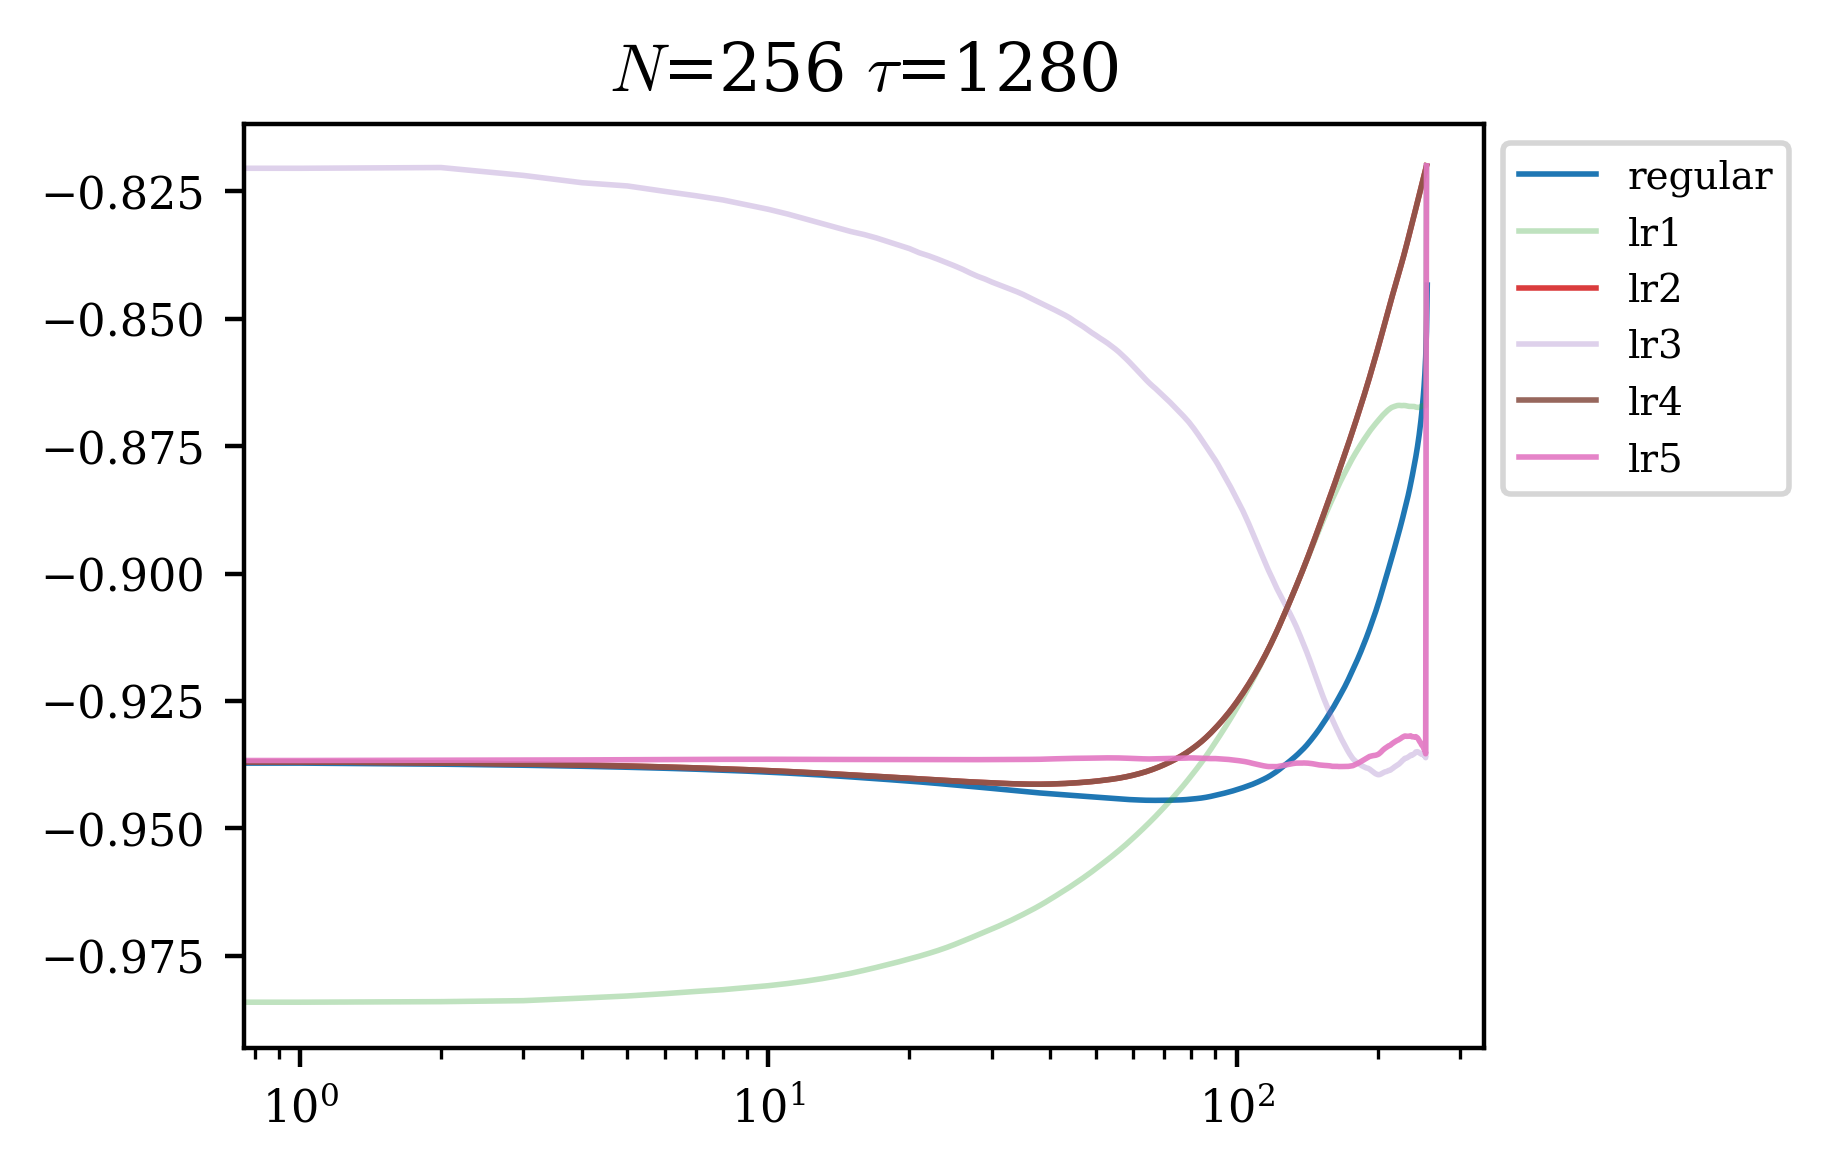

In [39]:
plt.figure(figsize=(4,3), dpi=400)
# plt.plot(lags, theoretical, 'k:', lw=3, label = '$e^{-t/τ}$')

plt.plot(lags, np.mean(acor, axis=0)-theoretical, 'C0', lw=lw, label='regular')
# plt.plot(lags, np.mean(meanacor, axis=0), 'C1', lw=3)
y_ = theoretical[:-1]
plt.plot(lags[:-1], np.mean(lr_a1, axis=0)-y_, 'C2', lw=lw, label='lr1', alpha=alpha2)
plt.plot(lags[:-1], np.mean(lr_a2, axis=0)-y_, 'C3', lw=lw, label='lr2', alpha=alpha1)
plt.plot(lags[:-1], np.mean(lr_a3, axis=0)-y_, 'C4', lw=lw, label='lr3', alpha=alpha2)
plt.plot(lags[:-1], np.mean(lr_a4, axis=0)-y_, 'C5', lw=lw, label='lr4', alpha=alpha1)
plt.plot(lags[:-1], np.mean(lr_a5, axis=0)-y_, 'C6', lw=lw, label='lr5', alpha=alpha1)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
# plt.yscale('symlog', linthresh=0.8)
# plt.ylim(-0.5, 1.1)
plt.xscale('log')
plt.title(f"$N$={sample_len}\t$\\tau$={tau}")
plt.show()

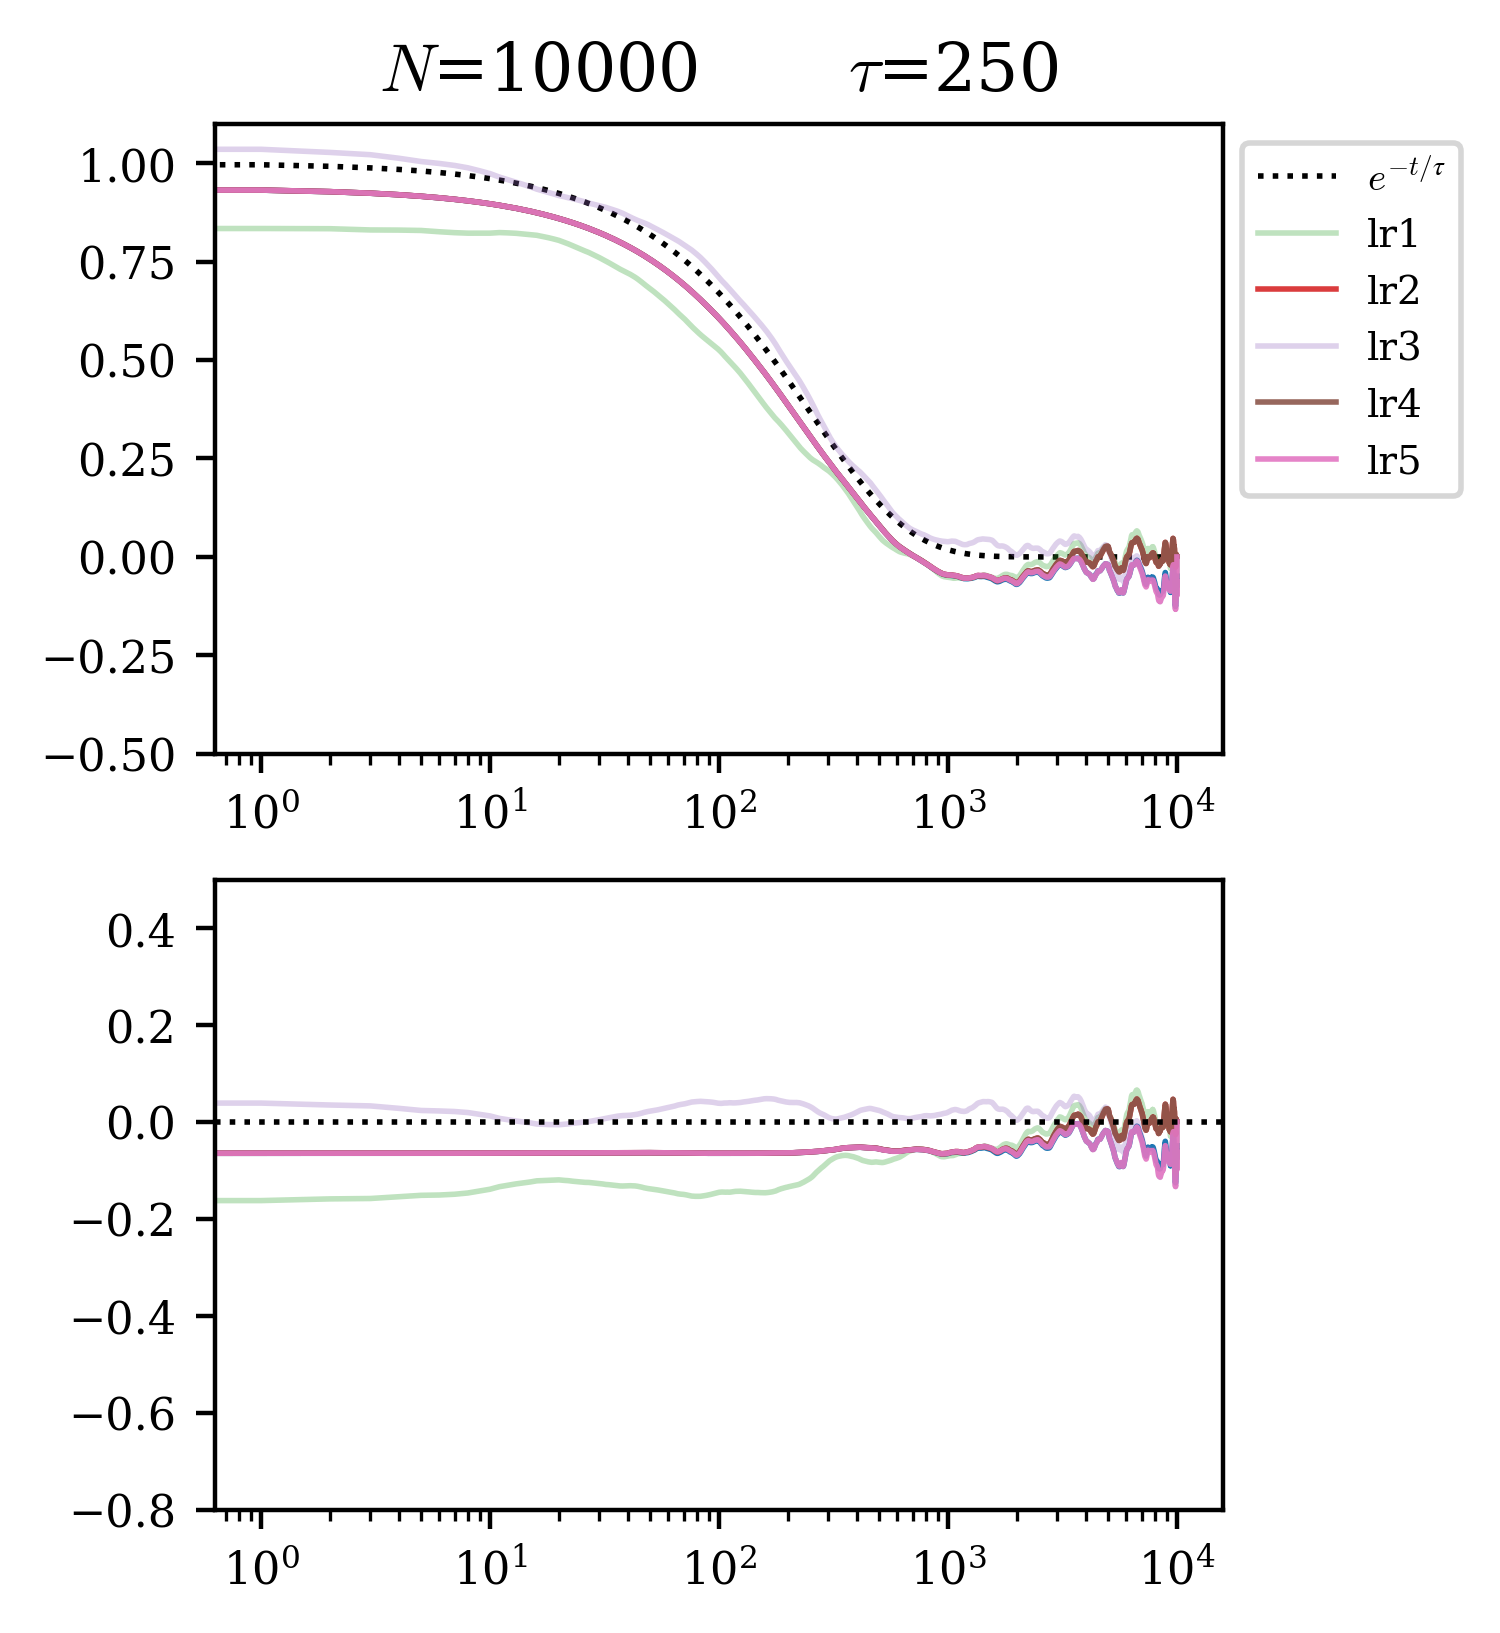

In [151]:
plt.subplots(2, 1, figsize=(3.25, 4.5), dpi=400)
plt.subplot(211)
plt.plot(lags, theoretical, 'k:', lw=lw, label = '$e^{-t/τ}$')

plt.plot(lags, np.mean(acor, axis=0), 'C0', lw=lw)


# plt.plot(lags, np.mean(meanacor, axis=0), 'C1', lw=3)
plt.plot(lags[:-1], np.mean(lr_a1, axis=0), 'C2', lw=lw, label='lr1', alpha=alpha2)
plt.plot(lags[:-1], np.mean(lr_a2, axis=0), 'C3', lw=lw, label='lr2', alpha=alpha1)
plt.plot(lags[:-1], np.mean(lr_a3, axis=0), 'C4', lw=lw, label='lr3', alpha=alpha2)
plt.plot(lags[:-1], np.mean(lr_a4, axis=0), 'C5', lw=lw, label='lr4', alpha=alpha1)
plt.plot(lags[:-1], np.mean(lr_a5, axis=0), 'C6', lw=lw, label='lr5', alpha=alpha1)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
# plt.yscale('symlog', linthresh=0.8)
plt.ylim(-0.5, 1.1)
plt.xscale('log')
plt.title(f"$N$={sample_len}\t$\\tau$={tau}")

plt.subplot(212)

plt.plot(lags, np.mean(acor, axis=0)-theoretical, 'C0', lw=lw, label='regular')
# plt.plot(lags, np.mean(meanacor, axis=0), 'C1', lw=3)
y_ = theoretical[:-1]
plt.plot(lags[:-1], np.mean(lr_a1, axis=0)-y_, 'C2', lw=lw, label='lr1', alpha=alpha2)
plt.plot(lags[:-1], np.mean(lr_a2, axis=0)-y_, 'C3', lw=lw, label='lr2', alpha=alpha1)
plt.plot(lags[:-1], np.mean(lr_a3, axis=0)-y_, 'C4', lw=lw, label='lr3', alpha=alpha2)
plt.plot(lags[:-1], np.mean(lr_a4, axis=0)-y_, 'C5', lw=lw, label='lr4', alpha=alpha1)
plt.plot(lags[:-1], np.mean(lr_a5, axis=0)-y_, 'C6', lw=lw, label='lr5', alpha=alpha1)

plt.axhline(0, ls=':', c='k', lw=lw)
plt.ylim(-0.8, 0.5)
plt.xscale('log')

plt.show()

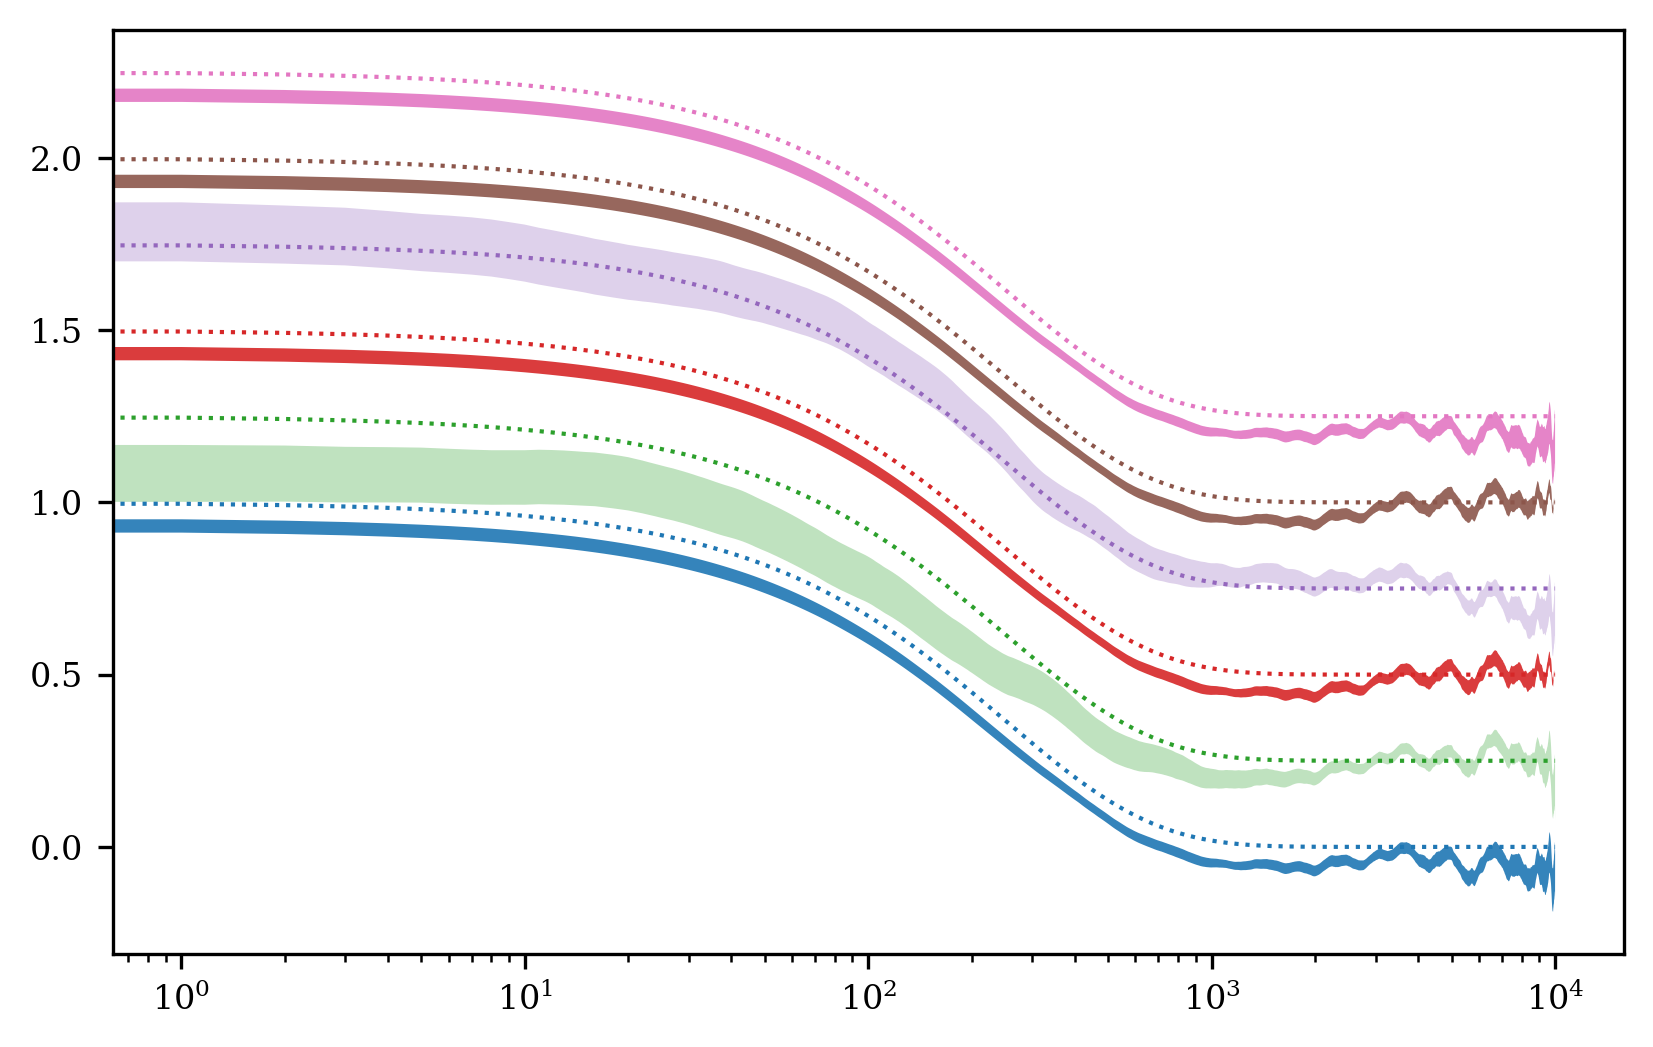

In [184]:
plt.figure(figsize=(6.5,4), dpi=300)

denom = 4
for i in range(6):
    plt.plot(lags, theoretical+i/denom, ':', lw=lw, label = '$e^{-t/τ}$', c=f'C{[0,2,3,4,5,6][i]}')

mm = np.mean(acor,axis=0)
ss = np.std(acor, axis=0)/ntries**0.5
plt.fill_between(lags, y1=mm+ss, y2=mm-ss, facecolor='C0', lw=lw, alpha=alpha1)


# plt.plot(lags, np.mean(meanacor, axis=0), 'C1', lw=3)

mm = np.mean(lr_a1,axis=0)+1/denom
ss = np.std(lr_a1, axis=0)/ntries**0.5
plt.fill_between(lags[:-1], y1=mm+ss, y2=mm-ss, facecolor='C2', lw=lw, label='lr1', alpha=alpha2)

mm = np.mean(lr_a2,axis=0)+2/denom
ss =  np.std(lr_a2, axis=0)/ntries**0.5
plt.fill_between(lags[:-1], y1=mm+ss, y2=mm-ss, facecolor='C3', lw=lw, label='lr2', alpha=alpha1)

mm = np.mean(lr_a3,axis=0)+3/denom
ss =  np.std(lr_a3, axis=0)/ntries**0.5
plt.fill_between(lags[:-1], y1=mm+ss, y2=mm-ss, facecolor='C4', lw=lw, label='lr3', alpha=alpha2)

mm = np.mean(lr_a4,axis=0)+4/denom
ss =  np.std(lr_a4, axis=0)/ntries**0.5
plt.fill_between(lags[:-1], y1=mm+ss, y2=mm-ss, facecolor='C5', lw=lw, label='lr4', alpha=alpha1)

mm = np.mean(lr_a5,axis=0)+5/denom
ss =  np.std(lr_a5, axis=0)/ntries**0.5
plt.fill_between(lags[:-1], y1=mm+ss, y2=mm-ss, facecolor='C6', lw=lw, label='lr5', alpha=alpha1)


plt.xscale('log')

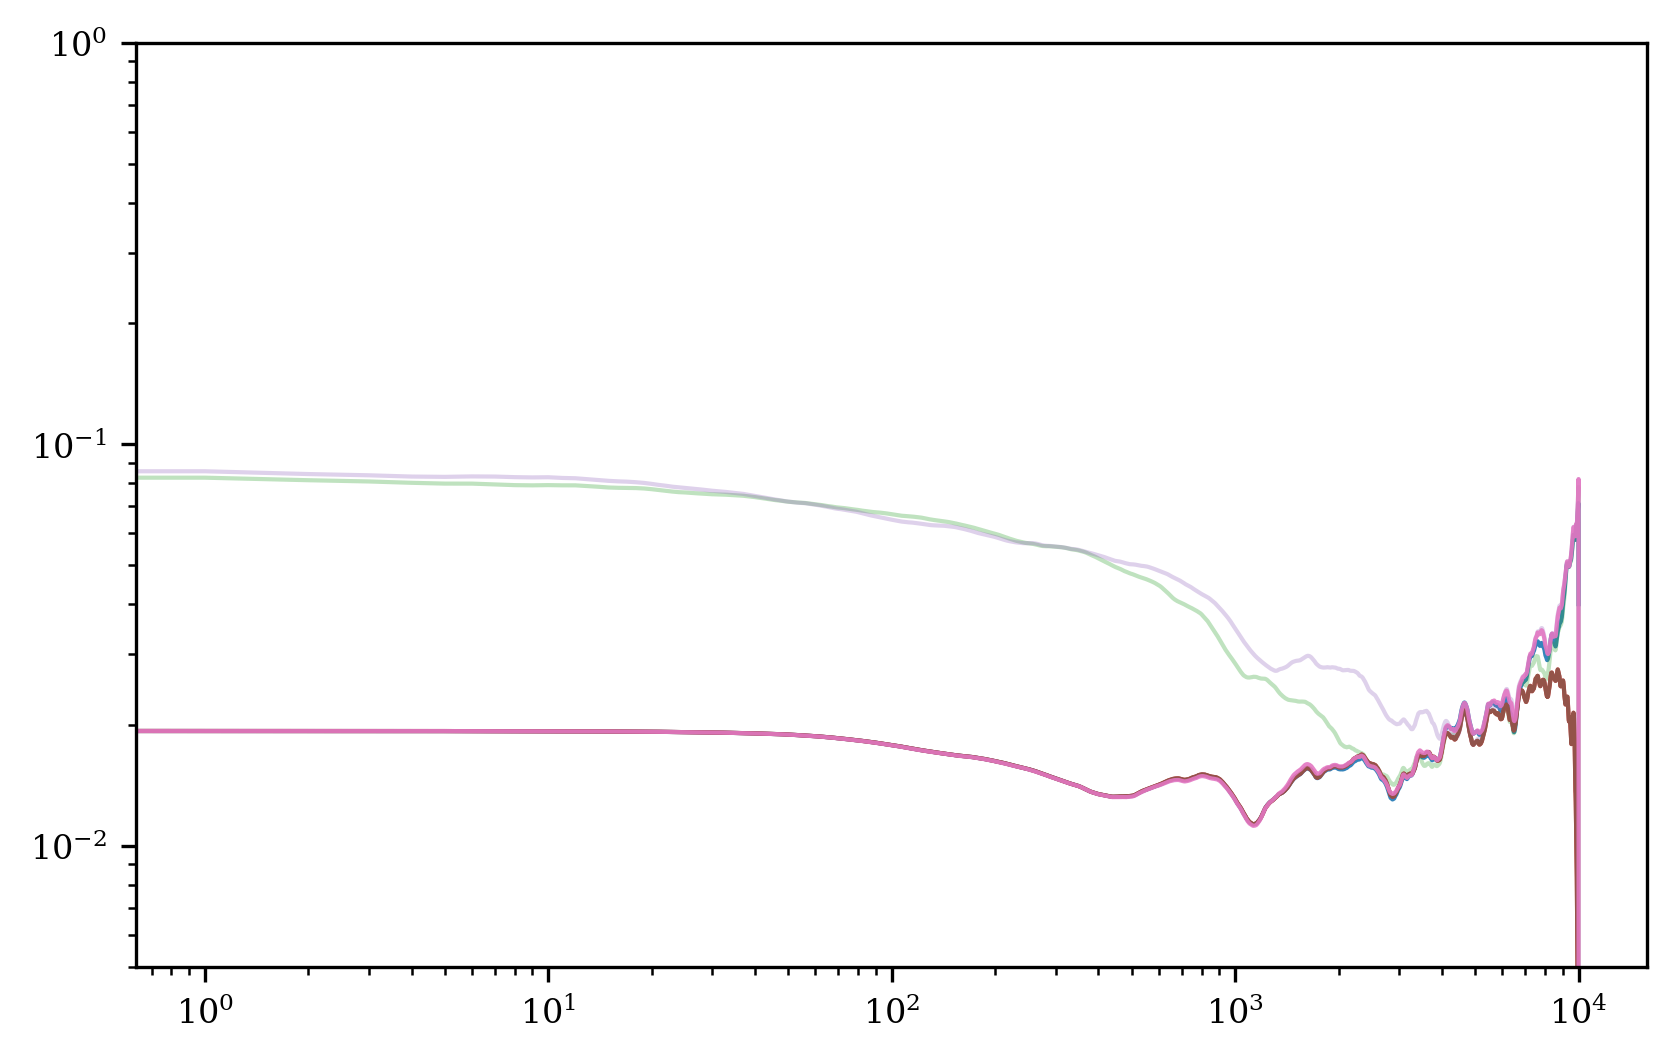

In [243]:
plt.figure(figsize=(6.5,4), dpi=300)

mm = np.mean(acor,axis=0)
ss = np.std(acor, axis=0)/ntries**0.5
plt.plot(lags, ss, c='C0', lw=lw, alpha=alpha1)


# plt.plot(lags, np.mean(meanacor, axis=0), 'C1', lw=3)

ss = np.std(lr_a1, axis=0)/ntries**0.5
plt.plot(lags[:-1], ss, c='C2', lw=lw, label='lr1', alpha=alpha2)

ss =  np.std(lr_a2, axis=0)/ntries**0.5
plt.plot(lags[:-1], ss, c='C3', lw=lw, label='lr2', alpha=alpha1)

ss =  np.std(lr_a3, axis=0)/ntries**0.5
plt.plot(lags[:-1], ss, c='C4', lw=lw, label='lr3', alpha=alpha2)
# plt.plot(lags[:-1], ss, c='k', lw=lw, label='lr3', alpha=1, zorder=100)

ss =  np.std(lr_a4, axis=0)/ntries**0.5
plt.plot(lags[:-1], ss, c='C5', lw=lw, label='lr4', alpha=alpha1)

ss =  np.std(lr_a5, axis=0)/ntries**0.5
plt.plot(lags[:-1], ss, c='C6', lw=lw, label='lr5', alpha=alpha1)

plt.yscale('log')
plt.ylim(5e-3, 1)


plt.xscale('log')

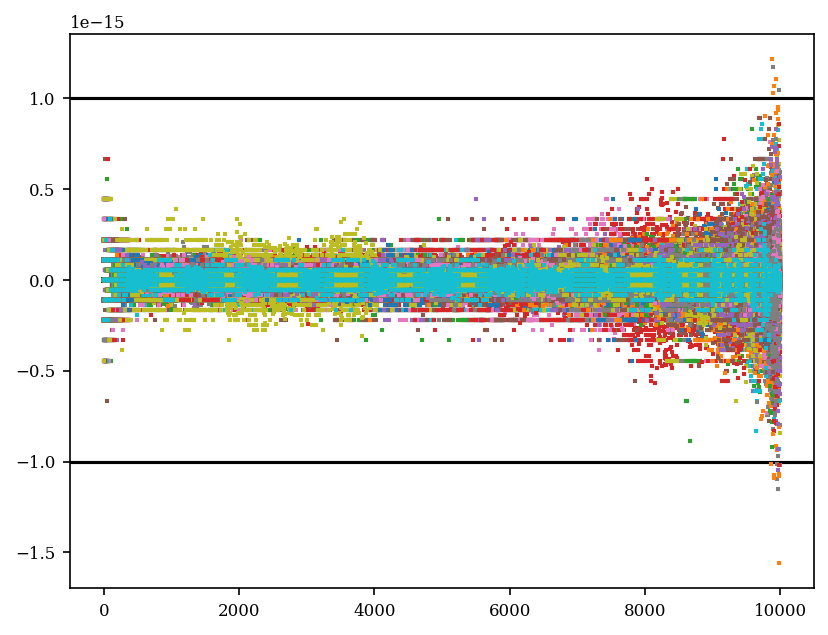

In [152]:
plt.axhline(1e-15, c='k')
plt.axhline(-1e-15, c='k')
plt.plot((lr_a2 - lr_a4).T, 's', ms=1)
plt.show()

In [17]:
plt.subplots(2, 2, figsize=(8,5), dpi=200, constrained_layout=True)
for s in range(4):
    print(s)
    plt.subplot(2, 2, s+1)
    plt.plot(lags, acor[0], 'C0', alpha = 1, lw=0.7, label = "Generated Trajectories")
    for i in range(1, ntries):
        plt.plot(lags, acor[i], 'C0', alpha = 0.2, lw=0.7)
    plt.plot(lags, theoretical, 'k', lw=3, label = '$e^{-t/τ}$')
    plt.ylim(-0.1, 1)
#     plt.xlim(0, 10000)
    if s%2:
        plt.xlim(left=0.5)
        plt.xscale('log')
    if s//2:
        plt.yscale('symlog', linthresh = 5e-2)
        plt.ylim(-2,2)
    plt.plot(lags, np.mean(acor, axis=0), 'r', lw=1, label = 'mean of samples')
    if s==0:
        plt.legend(loc='upper right')

print('plotting')
plt.suptitle(f'τ={tau:0.0f}, Autocorrelation Function')
plt.show()

0
1
2
3
plotting


# Naive fit

In [119]:
def expfit(t, a, b, c):
    return a*np.exp(-t/b) + c
expmodel = lf.Model(expfit, independent_vars='t')

In [120]:
mm = np.mean(acor, axis=0)
ss = np.std(acor, axis=0)/(len(acor)-1)**0.5

params = expmodel.make_params()

params.add('a', min = 0.001, max = 10)
params.add('b', min = 500, max = 15000)
params.add('c', min = -50, max = 50)

start = 50
stop = sample_len//10
nw = 200

pos = np.zeros((nw, 3))
pos[:, 0] = np.random.uniform(0.001, 10, nw)
pos[:, 1] = np.random.uniform(500, 15000, nw)
pos[:, 2] = np.random.uniform(-50, 50, nw)
result = expmodel.fit(
    mm[start:stop], params, t=np.arange(start,stop), method='emcee',
    fit_kws={'nwalkers': nw, 'pos': pos, 'burn': 200, 'steps': 2000},
    weights = ss[start:stop]**-1
)

100%|██████████████████████████████████████| 2000/2000 [00:17<00:00, 116.69it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 40;
tau: [33.59153778 56.56916071 14.97500488]


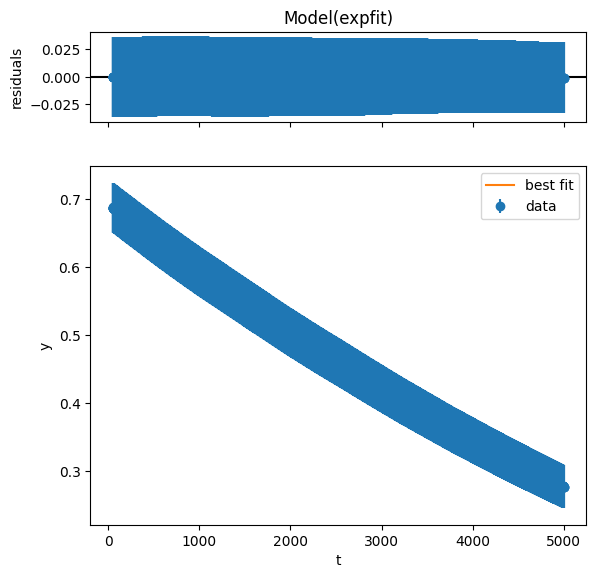

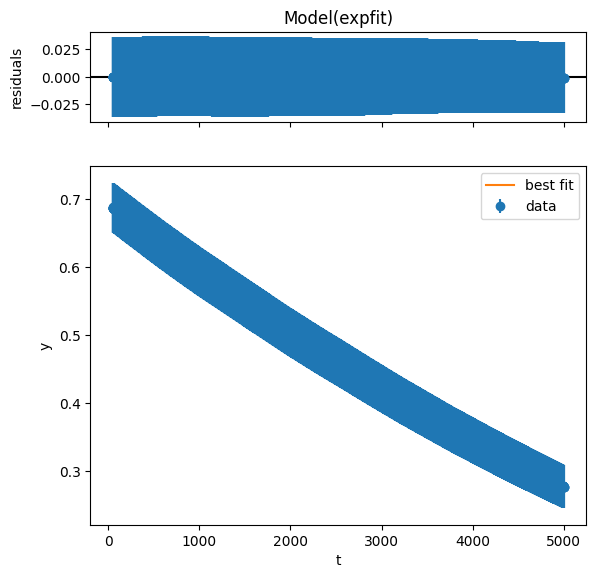

In [121]:
result.plot()

## looking at the "chains" (monte carlo trajectories) of the parameter walkers

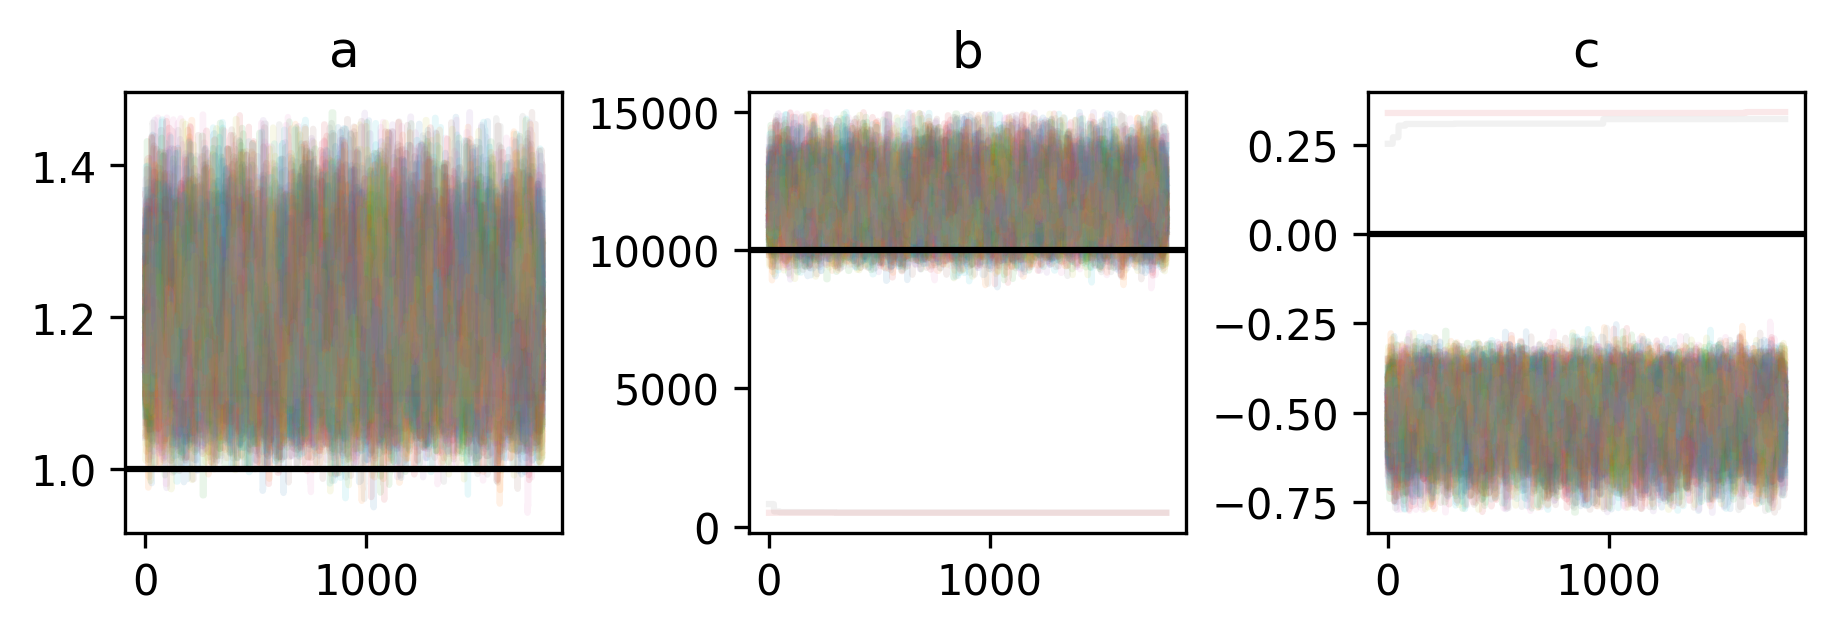

In [122]:
plt.subplots(1, 3, figsize=(6, 2), constrained_layout=True, dpi=300)
for sub in range(3):
    plt.subplot(1, 3, sub+1)
    plt.plot(result.chain[:, :, sub], alpha=0.1)
    plt.title(list(result.params)[sub])
plt.subplot(131)
plt.axhline(1, c='k')
plt.subplot(132)
plt.axhline(tau, c='k')
plt.subplot(133)
plt.axhline(0, c='k')

# Bias Corrected Fit

In [123]:
def cor_exp(t, a, b, c, n=sample_len):
    return c+acorcor.corrected_exp(t, b, n, a=a)
cexpmodel = lf.Model(cor_exp, independent_vars='t')

In [124]:
mm = np.mean(acor, axis=0)
ss = np.std(acor, axis=0)/(len(acor)-1)**0.5

params = cexpmodel.make_params()

params.add('a', min = 0.001, max = 4)
params.add('b', min = 500, max = 15000)
params.add('c', min = -50, max = 50, value=0, vary=False)
params.add('n', value=sample_len, vary=False)

start = 50
stop = sample_len//2
nw = 200

pos = np.zeros((nw, 2))
pos[:, 0] = np.random.uniform(0.001, 4, nw)
pos[:, 1] = np.random.uniform(1000, 15000, nw)
# pos[:, 2] = np.random.uniform(-50, 50, nw)
c_result = cexpmodel.fit(
    mm[start:stop], params, t=np.arange(start,stop), method='emcee',
    fit_kws={'nwalkers': nw, 'pos': pos, 'burn': 200, 'steps': 2000},
    weights = ss[start:stop]**-1
)

100%|███████████████████████████████████████| 2000/2000 [01:58<00:00, 16.92it/s]


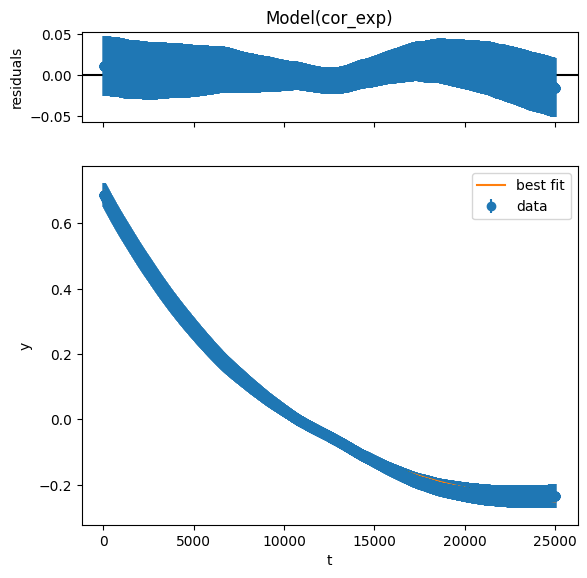

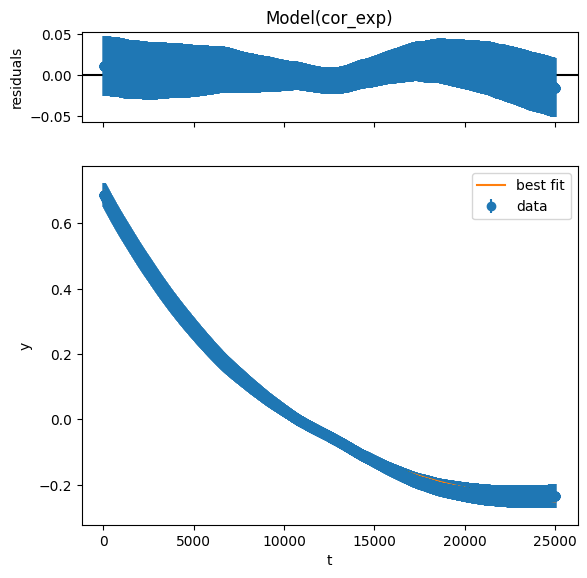

In [125]:
c_result.plot()

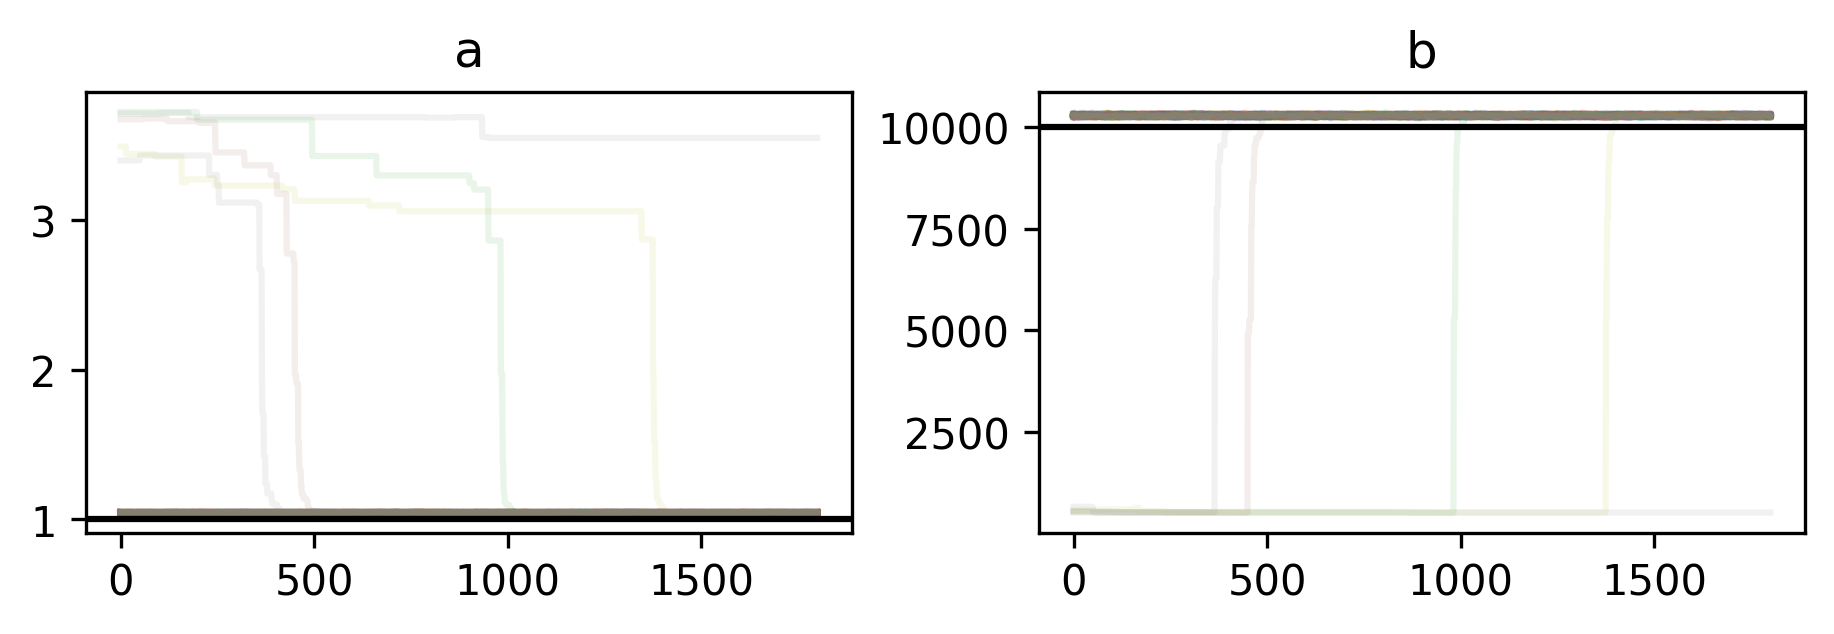

In [126]:
plt.subplots(1, 2, figsize=(6, 2), constrained_layout=True, dpi=300)
for sub in range(2):
    plt.subplot(1, 2, sub+1)
    plt.plot(c_result.chain[:, :, sub], alpha=0.1)
    plt.title(list(c_result.params)[sub])
plt.subplot(121)
plt.axhline(1, c='k')
plt.subplot(122)
plt.axhline(tau, c='k')

In [127]:
print(f"{result.params['b'].value:0.1f} ± {result.params['b'].stderr:0.1f}")
print(f"{c_result.params['b'].value:0.1f} ± {c_result.params['b'].stderr:0.1f}")

11514.2 ± 885.6
10294.6 ± 19.6


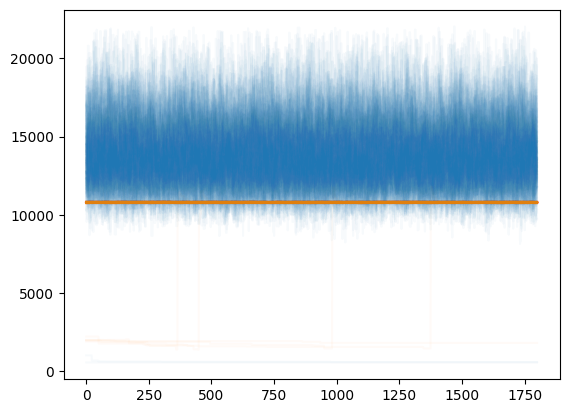

In [130]:
plt.plot(result.chain[:, :, 0]*result.chain[:, :, 1], alpha=0.03, c='C0')
plt.plot(c_result.chain[:, :, 0]*c_result.chain[:, :, 1], alpha=0.03, c='C1')
plt.show()

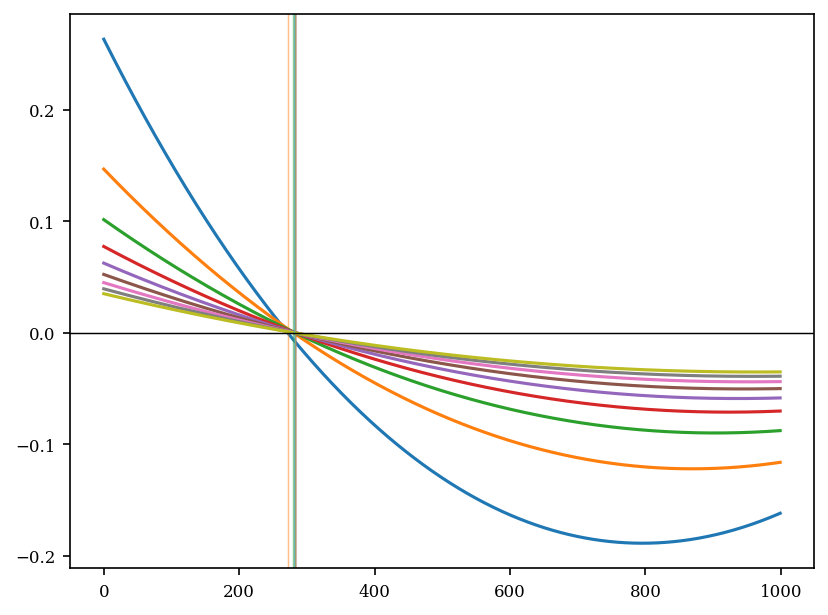

In [58]:
siglen = 1000
t_ = np.arange(0,siglen)
for i in range(1, 10):
    y = acorcor.corrected_exp(t_, siglen*i, siglen)
    plt.plot(y)
    plt.axvline(np.argmin(np.abs(y)), c=f'C{i}', lw=0.7, alpha=0.5)
plt.axhline(0, c='k', lw=0.7)
# plt.ylim(0,1)

(0.0, 1.0)

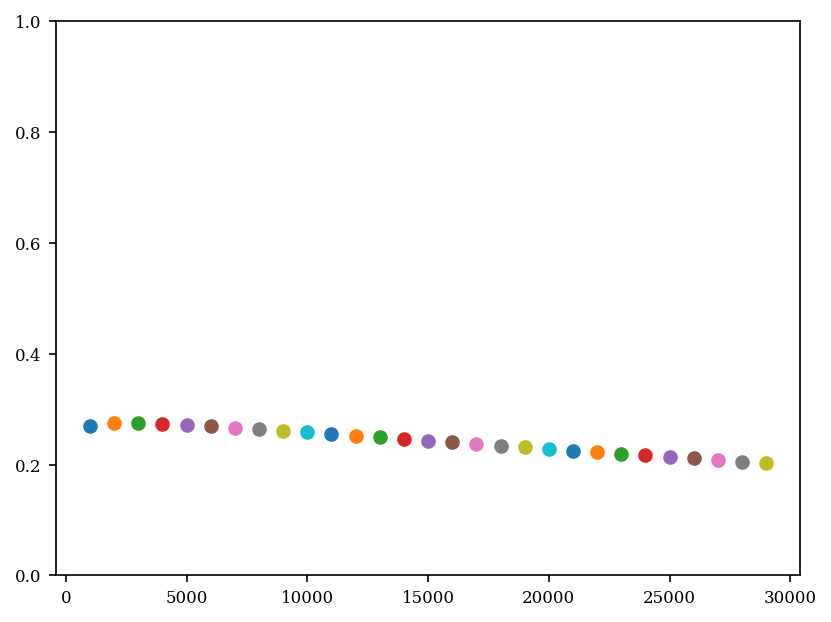

In [43]:
siglen = 1000
t_ = np.arange(0,siglen)
for i in range(1, 30):
    y = acorcor.corrected_exp(t_, siglen*i, siglen)+acorcor.corrected_exp(t_, 10, siglen)/10
    # plt.plot(t_, y)
    plt.plot(siglen*i, np.argmin(np.abs(y))/siglen, 'o')
plt.ylim(0,1)